## **DATA SCIENCIE I CODERHOUSE: COMISIÓN 61750**

Alumno: **Yesid García Sierra**

### **Introducción**

A continuación presentamos una recolección del conjunto de datos comerciales para una cadena de supermercados, compuesto por 40 columnas que nos permiten explorar diversas hipótesis relacionadas con el comportamiento de los clientes, las ventas, costos operativos, unidades de negocio y productos. Este proyecto tiene como objetivo proporcionar una exploración profunda de los factores que influyen en las ventas unitarias y los costos asociados en diferentes mercados, ayudando a las tiendas a optimizar sus estrategias de mercadeo, segmentación de clientes y optimización de sus tiendas y productos.

### **Descripción del problema**

Los supermercados enfrentan el desafío de maximizar sus ventas mientras controlan los costos operativos a travez de los factores externos de su matriz Doffa. Además, necesitan comprender las diferencias en el comportamiento de los clientes según diversas características culturales, demográficas y geográficas que influyen en el consumo masivo. Este Proyecto desea identificar patrones y tendencias que puedan ser utilizados para diseñar estrategias de marketing, promociones efectivas y una predicción exacta de sus hipotesis, adaptadas a los comportamientos específicos que se van a encontrar en el Dataset muestreado para este proyecto.

### **Objetivo**

El objetivo principal de este análisis, realizado mediante técnicas de análisis de datos con Python y sus librerías (como Pandas, NumPy, Matplotlib y Seaborn), es identificar patrones y tendencias en un conjunto de datos de supermercados. Esto permitirá a las tiendas optimizar sus estrategias de promoción, ventas y segmentación de clientes.

A través del análisis, se busca obtener insights que permitan predecir:

El incremento en las ventas unitarias debido a promociones específicas: Se utilizarán técnicas de análisis exploratorio de datos y visualización para identificar las promociones que generan un mayor impacto en las ventas.
Diferencias en ventas y costos operativos entre distintas regiones geográficas: Se analizarán las ventas y costos por país o región utilizando agrupaciones y gráficos comparativos.
Preferencias de compra de los clientes con diferentes perfiles educativos y demográficos: Se estudiará la relación entre el nivel educativo, estado civil, género y otros datos demográficos con las compras realizadas.
Influencia de las características físicas de los supermercados en las ventas: Se analizarán variables como el tamaño de la tienda, la distribución de las secciones y otros factores que puedan influir en las ventas.

Estas predicciones, obtenidas mediante el análisis de datos con Python, proporcionarán insights valiosos para optimizar estrategias de marketing, mejorar la eficiencia operativa y personalizar las ofertas para diferentes segmentos de clientes.

### **Fuente**

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/code/mayurspawar/customer-acquisition-prediction/data

Este conjunto de datos proporciona información detallada sobre ventas en supermercados, incluidos atributos como categoría de comida, departamento de alimentos, familia de comida, ventas y costos de tienda, promociones, características demográficas de los clientes, y especificaciones de los productos y tiendas. El uso de estos datos permitirá realizar un análisis exhaustivo y construir modelos predictivos robustos para optimizar las estrategias de promoción, segmentación de clientes y gestión de costos, mejorando así la eficiencia operativa y la satisfacción del cliente en el sector minorista.

## **Importación de Librerías y Carga de Datos**


In [1]:
#Importe librerias con la que quiero trabajar.
import pandas as pd
import numpy as np
#Librerias para visualizaciones
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import gdown
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from datetime import datetime
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Librerias para modelos de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [3]:
#Traemos nuestro Dataset desde Gitgub previamente cargado:
url='https://raw.githubusercontent.com/Yegasi14/DATASET-Proyecto-DATA-l/refs/heads/main/media%20prediction%20and%20its%20cost.csv'
df_archivo= pd.read_csv(url, sep=',', header=None)
# Configurar opciones para mostrar todas las columnas
pd.set_option('display.max_columns', None)
#Traemos el Dataframe
df_archivo.head()

<ipython-input-3-6144db8b7e2e>:3: DtypeWarning: Columns (3,4,5,10,15,17,18,20,21,22,23,24,25,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_archivo= pd.read_csv(url, sep=',', header=None)


0                1            2                         3   \
0    food_category  food_department  food_family  store_sales(in millions)   
1  Breakfast Foods     Frozen Foods         Food                      7.36   
2  Breakfast Foods     Frozen Foods         Food                      5.52   
3  Breakfast Foods     Frozen Foods         Food                      3.68   
4  Breakfast Foods     Frozen Foods         Food                      3.68   

                        4                        5                      6   \
0  store_cost(in millions)  unit_sales(in millions)         promotion_name   
1                   2.7232                      4.0           Bag Stuffers   
2                   2.5944                      3.0  Cash Register Lottery   
3                   1.3616                      2.0    High Roller Savings   
4                   1.1776                      2.0  Cash Register Lottery   

              7               8       9               10                   11  \
0  sales_country  marital_status  gender  total_children            education   
1            USA               M       F             1.0  Partial High School   
2            USA               M       M             0.0     Bachelors Degree   
3            USA               S       F             4.0  Partial High School   
4            USA               M       F             2.0   High School Degree   

            12              13          14                        15  \
0  member_card      occupation  houseowner  avg_cars_at home(approx)   
1       Normal  Skilled Manual           Y                       1.0   
2       Silver    Professional           Y                       4.0   
3       Normal          Manual           N                       1.0   
4       Bronze          Manual           Y                       2.0   

                   16                    17                        18  \
0  avg. yearly_income  num_children_at_home  avg_cars_at home(approx)   
1         $10K - $30K                   1.0                       1.0   
2         $50K - $70K                   0.0                       4.0   
3         $10K - $30K                   0.0                       1.0   
4         $30K - $50K                   2.0                       2.0   

           19    20            21          22                  23       24  \
0  brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat   
1  Carrington  1.84          19.7        17.7                 1.0      0.0   
2  Carrington  1.84          19.7        17.7                 1.0      0.0   
3  Carrington  1.84          19.7        17.7                 1.0      0.0   
4  Carrington  1.84          19.7        17.7                 1.0      0.0   

               25                  26          27           28          29  \
0  units_per_case          store_type  store_city  store_state  store_sqft   
1            17.0  Deluxe Supermarket       Salem           OR     27694.0   
2            17.0  Deluxe Supermarket       Salem           OR     27694.0   
3            17.0  Deluxe Supermarket       Salem           OR     27694.0   
4            17.0  Deluxe Supermarket       Salem           OR     27694.0   

             30           31         32          33           34         35  \
0  grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar   
1       18670.0       5415.0     3610.0         1.0          1.0        1.0   
2       18670.0       5415.0     3610.0         1.0          1.0        1.0   
3       18670.0       5415.0     3610.0         1.0          1.0        1.0   
4       18670.0       5415.0     3610.0         1.0          1.0        1.0   

              36       37                  38      39  
0  prepared_food  florist          media_type    cost  
1            1.0      1.0  Daily Paper, Radio  126.62  
2            1.0      1.0  Daily Paper, Radio   59.86  
3            1.0      1.0  Daily Paper, Radio   84.16  
4            1.0      1.0 

## **Exploración de datos**

###Tamaño del Dataframe

In [4]:
#Dimensión inicial del Dataframe
df_archivo.shape

(60429, 40)

Este conjunto de datos contiene 60429 registros y 40 columnas

###Transdormación de filas

In [5]:
#Creamos una lista para renombrar las columnas originales con la fila 0:
df_columnas = {0:'food_category',1:'food_department',2:'food_family',3:'store_sales(in millions)',4:'store_cost(in millions)',5:'unit_sales(in millions)',6:'promotion_name',7:'sales_country',8:'marital_status',9:'gender',10:'total_children',11:'education',12:'member_card',13:'occupation',14:'houseowner',15:'avg_cars_at home(approx)',16:'avg. yearly_income',17:'num_children_at_home',18:'avg_cars_at home(approx)',19:'brand_name',20:'SRP',21:'gross_weight',22:'net_weight',23:'recyclable_package',24:'low_fat',25:'units_per_case',26:'store_type',27:'store_city',28:'store_state',29:'store_sqft',30:'grocery_sqft',31:'frozen_sqft',32:'meat_sqft',33:'coffee_bar',34:'video_store',35:'salad_bar',36:'prepared_food',37:'florist',38:'media_type',39:'cost'}
df_columnas

{0: 'food_category',
 1: 'food_department',
 2: 'food_family',
 3: 'store_sales(in millions)',
 4: 'store_cost(in millions)',
 5: 'unit_sales(in millions)',
 6: 'promotion_name',
 7: 'sales_country',
 8: 'marital_status',
 9: 'gender',
 10: 'total_children',
 11: 'education',
 12: 'member_card',
 13: 'occupation',
 14: 'houseowner',
 15: 'avg_cars_at home(approx)',
 16: 'avg. yearly_income',
 17: 'num_children_at_home',
 18: 'avg_cars_at home(approx)',
 19: 'brand_name',
 20: 'SRP',
 21: 'gross_weight',
 22: 'net_weight',
 23: 'recyclable_package',
 24: 'low_fat',
 25: 'units_per_case',
 26: 'store_type',
 27: 'store_city',
 28: 'store_state',
 29: 'store_sqft',
 30: 'grocery_sqft',
 31: 'frozen_sqft',
 32: 'meat_sqft',
 33: 'coffee_bar',
 34: 'video_store',
 35: 'salad_bar',
 36: 'prepared_food',
 37: 'florist',
 38: 'media_type',
 39: 'cost'}

###Identificación de Datos

A continuación una descripción de este listado y tipo de dato sugerido:

**1- POR CATEGORIA**

**food_category** :Categoría del alimento (ej. Vegetales, Frutas). sugerido object (texto)

**food_department** : Departamento del alimento (ej. Frutas y Vegetales, Lácteos). sugerido object (texto)

**food_family** : Familia del alimento (ej. Cítricos, Vegetales de hoja verde). sugerido object (texto)

**brand_name** : Nombre de la marca. sugerido object (texto)

**SRP** : Precio de venta sugerido. sugerido float (numérico decimal)

**gross_weight** : Peso bruto del producto. sugerido float (numérico decimal)

**net_weight** : Peso neto del producto. sugerido float (numérico decimal)

**recyclable_package** : Indica si el empaque es reciclable (Sí/No). sugerido boolean (booleano)

**low_fat** : Indica si el producto es bajo en grasa (Sí/No). sugerido boolean (booleano)

**units_per_case** : Unidades de producto por caja. sugerido int (numérico entero)



**2- POR VENTAS Y COSTOS**

**store_sales(in millions)** : Ventas de la tienda (en millones). sugerido float (numérico decimal)

**store_cost(in millions)** : Costo de la tienda (en millones). sugerido float (numérico decimal)

**unit_sales(in millions)** : Ventas unitarias (en millones). sugerido float (numérico decimal)

**promotion_name** : Nombre de la promoción. sugerido object (texto)

**cost** : Costo total. sugerido float (numérico decimal)

**3- POR CLIENTE**

**marital_status** : Estado civil (ej. Casado, Soltero). sugerido object (texto)

**gender** : Género (ej. Masculino, Femenino). sugerido object (texto)

**total_children** : Número total de hijos. sugerido int (numérico entero)

**education** : Nivel educativo (ej. Secundaria, Universidad). sugerido object (texto)

**member_card** : Tipo de tarjeta de miembro (ej. Bronce, Plata, Oro). sugerido object (texto)

**occupation** : Ocupación. sugerido object (texto)

**houseowner** : Indica si es propietario de una vivienda (Sí/No). sugerido boolean (booleano)

**avg_cars_at home(approx)** : Número promedio de autos en casa (aproximado). sugerido int (numérico entero)

**avg. yearly_income** : Ingreso anual promedio. sugerido float (numérico decimal)

**num_children_at_home** : Número de hijos en casa. sugerido int (numérico entero)


**4- POR CARACTERISTICAS DE LAS TIENDAS**

**store_sqft** : Pies cuadrados totales de la tienda. sugerido int (numérico entero)

**grocery_sqft** : Pies cuadrados de la sección de comestibles. suegerido int (numérico entero)

**frozen_sqft** : Pies cuadrados de la sección de congelados. sugerido int (numérico entero)

**meat_sqft** : Pies cuadrados de la sección de carnes. sugerido int (numérico entero)

**coffee_bar** : Indica si la tienda tiene cafetería (Sí/No). sugerido boolean (booleano)

**video_store** : Indica si la tienda tiene videoclub (Sí/No). sugerido boolean (booleano)

**salad_bar** : Indica si la tienda tiene barra de ensaladas (Sí/No). sugerido boolean (booleano)

**prepared_food** : Indica si la tienda tiene comida preparada (Sí/No). sugerido boolean (booleano)

**florist** : Indica si la tienda tiene floristería (Sí/No). sugerido boolean (booleano)


**Este diccionario es útil para asignar a los nombres de columnas índices númericos enteros y para renombrar las columnas del dataset para que sea más descriptivo y útil para el análisis de datos.**

###Transformación del Dataframe

In [6]:
#Verificamos los valorescon los que deseamos trabajar en nuestro Dataset
# Omitimos la primera fila.
df_Valores=df_archivo.values[1:,:]
df_Valores

array([['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '126.62'],
       ['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '59.86'],
       ['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '84.16'],
       ...,
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 0.0,
        'Sunday Paper, Radio, TV', 67.51],
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 1.0,
        'Sunday Paper', 132.88],
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 1.0,
        'Daily Paper, Radio', 87.76]], dtype=object)

Este código toma los datos del DataFrame, excluye la primera fila y almacena el resto en df_Valores.

Creamos un nuevo Dataframe con las columnas renombradas:

In [7]:
df=pd.DataFrame(df_Valores,columns=df_columnas)
df.rename(columns=df_columnas,inplace=True)
df.head()

food_category food_department food_family store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                     7.36   
1  Breakfast Foods    Frozen Foods        Food                     5.52   
2  Breakfast Foods    Frozen Foods        Food                     3.68   
3  Breakfast Foods    Frozen Foods        Food                     3.68   
4  Breakfast Foods    Frozen Foods        Food                     4.08   

  store_cost(in millions) unit_sales(in millions)         promotion_name  \
0                  2.7232                     4.0           Bag Stuffers   
1                  2.5944                     3.0  Cash Register Lottery   
2                  1.3616                     2.0    High Roller Savings   
3                  1.1776                     2.0  Cash Register Lottery   
4                   1.428                     3.0       Double Down Sale   

  sales_country marital_status gender total_children            education  \
0           USA              M      F            1.0  Partial High School   
1           USA              M      M            0.0     Bachelors Degree   
2           USA              S      F            4.0  Partial High School   
3           USA              M      F            2.0   High School Degree   
4           USA              M      M            0.0  Partial High School   

  member_card      occupation houseowner avg_cars_at home(approx)  \
0      Normal  Skilled Manual          Y                      1.0   
1      Silver    Professional          Y                      4.0   
2      Normal          Manual          N                      1.0   
3      Bronze          Manual          Y                      2.0   
4      Bronze  Skilled Manual          N                      2.0   

  avg. yearly_income num_children_at_home avg_cars_at home(approx)  \
0        $10K - $30K                  1.0                      1.0   
1        $50K - $70K                  0.0                      4.0   
2        $10K - $30K                  0.0                      1.0   
3        $30K - $50K                  2.0                      2.0   
4        $30K - $50K                  0.0                      2.0   

   brand_name   SRP gross_weight net_weight recyclable_package low_fat  \
0  Carrington  1.84         19.7       17.7                1.0     0.0   
1  Carrington  1.84         19.7       17.7                1.0     0.0   
2  Carrington  1.84         19.7       17.7                1.0     0.0   
3  Carrington  1.84         19.7       17.7                1.0     0.0   
4      Golden  1.36         7.12       5.11                0.0     1.0   

  units_per_case          store_type store_city store_state store_sqft  \
0           17.0  Deluxe Supermarket      Salem          OR    27694.0   
1           17.0  Deluxe Supermarket      Salem          OR    27694.0   
2           17.0  Deluxe Supermarket      Salem          OR    27694.0   
3           17.0  Deluxe Supermarket      Salem          OR    27694.0   
4           29.0  Deluxe Supermarket      Salem          OR    27694.0   

  grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar  \
0      18670.0      5415.0    3610.0        1.0         1.0       1.0   
1      18670.0      5415.0    3610.0        1.0         1.0       1.0   
2      18670.0      5415.0    3610.0        1.0         1.0       1.0   
3      18670.0      5415.0    3610.0        1.0         1.0       1.0   
4      18670.0      5415.0    3610.0        1.0         1.0       1.0   

  prepared_food florist          media_type    cost  
0           1.0     1.0  Daily Paper, Radio  126.62  
1           1.0     1.0  Daily Paper, Radio   59.86  
2           1.0     1.0  Daily Paper, Radio   84.16  
3           1.0     1.0     In-Store Coupon   95.78  
4           1.0     1.0               Radio   50.79

Se crea un nuevo DataFrame llamado df usando los valores contenidos en df_Valores y las columnas de este serán nombradas según los valores del diccionario df_columnas.

In [8]:
#Verificamos nueva dimensión del Dataframe
df.shape

(60428, 40)

Hacemos la exploración del tipo de datos con el nuevo Dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   food_category             60428 non-null  object
 1   food_department           60428 non-null  object
 2   food_family               60428 non-null  object
 3   store_sales(in millions)  60428 non-null  object
 4   store_cost(in millions)   60428 non-null  object
 5   unit_sales(in millions)   60428 non-null  object
 6   promotion_name            60428 non-null  object
 7   sales_country             60428 non-null  object
 8   marital_status            60428 non-null  object
 9   gender                    60428 non-null  object
 10  total_children            60428 non-null  object
 11  education                 60428 non-null  object
 12  member_card               60428 non-null  object
 13  occupation                60428 non-null  object
 14  houseowner            

Se observa que el tipo de datos de las variebles son de tipo object.

**VARIABLES POTENCIALMENTE RELEVANTES** :
Algunas de las variables que podrìan ser relevantes para predecir las estrategias de marketing son: promotion_name, store_sales(in millions), store_cost(in millions), unit_sales(in millions), sales_country, education, store_type, marital_status, brand_name, gender.

Estas ya fueron descritas y clasificadas anteriormente para organizar el análisis

###Descripción de Columnas

In [10]:
df.describe()

food_category food_department food_family  store_sales(in millions)  \
count          60428           60428       60428                   60428.0   
unique            45              22           3                    1767.0   
top       Vegetables         Produce        Food                       4.8   
freq            7440            8521       43284                     232.0   

        store_cost(in millions)  unit_sales(in millions)    promotion_name  \
count                  60428.00                  60428.0             60428   
unique                 15073.00                     12.0                49   
top                        2.16                      3.0  Weekend Markdown   
freq                      52.00                  20064.0              2330   

       sales_country marital_status gender  total_children  \
count          60428          60428  60428         60428.0   
unique             3              2      2            12.0   
top              USA              S      F             2.0   
freq           38892          30355  30942          9100.0   

                  education member_card    occupation houseowner  \
count                 60428       60428         60428      60428   
unique                    5           4             5          2   
top     Partial High School      Bronze  Professional          Y   
freq                  18201       33807         19915      36510   

        avg_cars_at home(approx) avg. yearly_income  num_children_at_home  \
count                    60428.0              60428               60428.0   
unique                      10.0                  8                  12.0   
top                          2.0        $30K - $50K                   0.0   
freq                     13241.0              19514               27280.0   

        avg_cars_at home(approx) brand_name       SRP  gross_weight  \
count                    60428.0      60428  60428.00       60428.0   
unique                      10.0        111    542.00         535.0   
top                          2.0   Hermanos      2.65          19.9   
freq                     13241.0       1839    467.00         528.0   

        net_weight  recyclable_package  low_fat  units_per_case   store_type  \
count      60428.0             60428.0  60428.0         60428.0        60428   
unique       477.0                 4.0      4.0            72.0            5   
top           11.6                 1.0      0.0            29.0  Supermarket   
freq         761.0             24318.0  29099.0          1815.0        26192   

       store_city store_state  store_sqft  grocery_sqft  frozen_sqft  \
count       60428       60428     60428.0       60428.0      60428.0   
unique         19          10        40.0          40.0         40.0   
top        Tacoma          WA     33858.0       22123.0       7041.0   
freq         5704       19370      4134.0        4134.0       4134.0   

        meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist  \
count     60428.0     60428.0      60428.0    60428.0        60428.0  60428.0   
unique       40.0         4.0          4.0        4.0            4.0      4.0   
top        4694.0         1.0          0.0        1.0            1.0      1.0   
freq       4134.0     26967.0      28472.0    25876.0        25876.0  24715.0   

                media_type      cost  
count                60428  60428.00  
unique                  13    656.00  
top     Daily Paper, Radio    101.84  
freq                  6820    587.00

Exploración de ventas por tienda

In [11]:
promedio_ventas_tiendas = df['store_sales(in millions)'].astype(float).mean()
print(f"El promedio de ventas en millones es: {promedio_ventas_tiendas}")

total_ventas_tiendas = df['store_sales(in millions)'].astype(float).sum()
print(f"El total de ventas en millones es: {total_ventas_tiendas}")

El promedio de ventas en millones es: 6.541030648043952
El total de ventas en millones es: 395261.3999999999


Exploración de costos por tienda

In [12]:
promedio_costos_tiendas = df['store_cost(in millions)'].astype(float).mean()
print(f"El promedio de costos en millones es: {promedio_costos_tiendas}")

total_costos_tiendas = df['store_cost(in millions)'].astype(float).sum()
print(f"El total de costos en millones es: {total_costos_tiendas}")

El promedio de costos en millones es: 2.619459500562653
El total de costos en millones es: 158288.6987


Exploración de costos totales

In [13]:
promedio_costos_totales = df['cost'].astype(float).mean()
print(f"El promedio de costos totales en millones es: {promedio_costos_totales}")

total_costos_totales = df['cost'].astype(float).sum()
print(f"El total de costos en millones es: {total_costos_totales}")

El promedio de costos totales en millones es: 99.26236612166544
El total de costos en millones es: 5998226.259999999


##Generalidades

A continuación vamos a explicar las generalidades de las diferentes variables y categorias con las que deseamos trabajar en este proyecto:


* Hay **60428** registros

* **food_category:** Hay 45 categorias de comidas y en el top esta vegetales como mas elegida con unsa frecuencia de 7440 registros.

* **food_department:** tenemos 22 departartamentos cuyo Top es la el de producción con 8521 registros.

* **food_family:** Tenemos 3 familias, cuya principal categoria es la de Comidas con 43284 registros.

* **store_sales(in millions):**El total de ventas en millones es de 395261.39 con un promedio de 6.54 millones.

* **store_cost(in millions):** El total de costos en millones es: 158288.69 con un promedio de 2.62 millones por tienda.

* **unit_sales(in millions):** La venta unitaria mas alta es de 3.0 millones

* **promotion_name:** en el top esta Weekend Markdown de las 49 promociones registradas.

* **sales_country:** de los 3 países identificado en el top esta USA.

* **education:** Teneos 5 niveles educativos de los cuales Partial High School es el que registra mas consumos con una frecuencia de 18201 registros.

* **member_card:** Tenemos 4 tipos de Member Card donde las mayores compras son con Bronze.

* **occupation:** Hay 5 tipos de ocupaciones de las cuales los profesionales reportan más consumos.

* **store_type:** Tenemos 5 categorias de tienda de las cuales la categoría Supermarket es la que tiene mayores registros con una frecuencia de 26192.

* **cost:** El total de costos es de 5998226.25 Millones con un promedio de 99.26 Millones en los registros.


##**Procesamiento de datos**

### **Validación de Datos Nulos**

Realizamos la validación de valores nulos como Booleanos

In [14]:
df.isnull().sum().astype(bool)

food_category               False
food_department             False
food_family                 False
store_sales(in millions)    False
store_cost(in millions)     False
unit_sales(in millions)     False
promotion_name              False
sales_country               False
marital_status              False
gender                      False
total_children              False
education                   False
member_card                 False
occupation                  False
houseowner                  False
avg_cars_at home(approx)    False
avg. yearly_income          False
num_children_at_home        False
avg_cars_at home(approx)    False
brand_name                  False
SRP                         False
gross_weight                False
net_weight                  False
recyclable_package          False
low_fat                     False
units_per_case              False
store_type                  False
store_city                  False
store_state                 False
store_sqft                  False
grocery_sqft                False
frozen_sqft                 False
meat_sqft                   False
coffee_bar                  False
video_store                 False
salad_bar                   False
prepared_food               False
florist                     False
media_type                  False
cost                        False
dtype: bool

Podemos hacer la validación de Nulos de Manera Visual con la Herramienta **missingno** de la siguiente manera:

In [15]:
!pip install missingno

<Axes: >

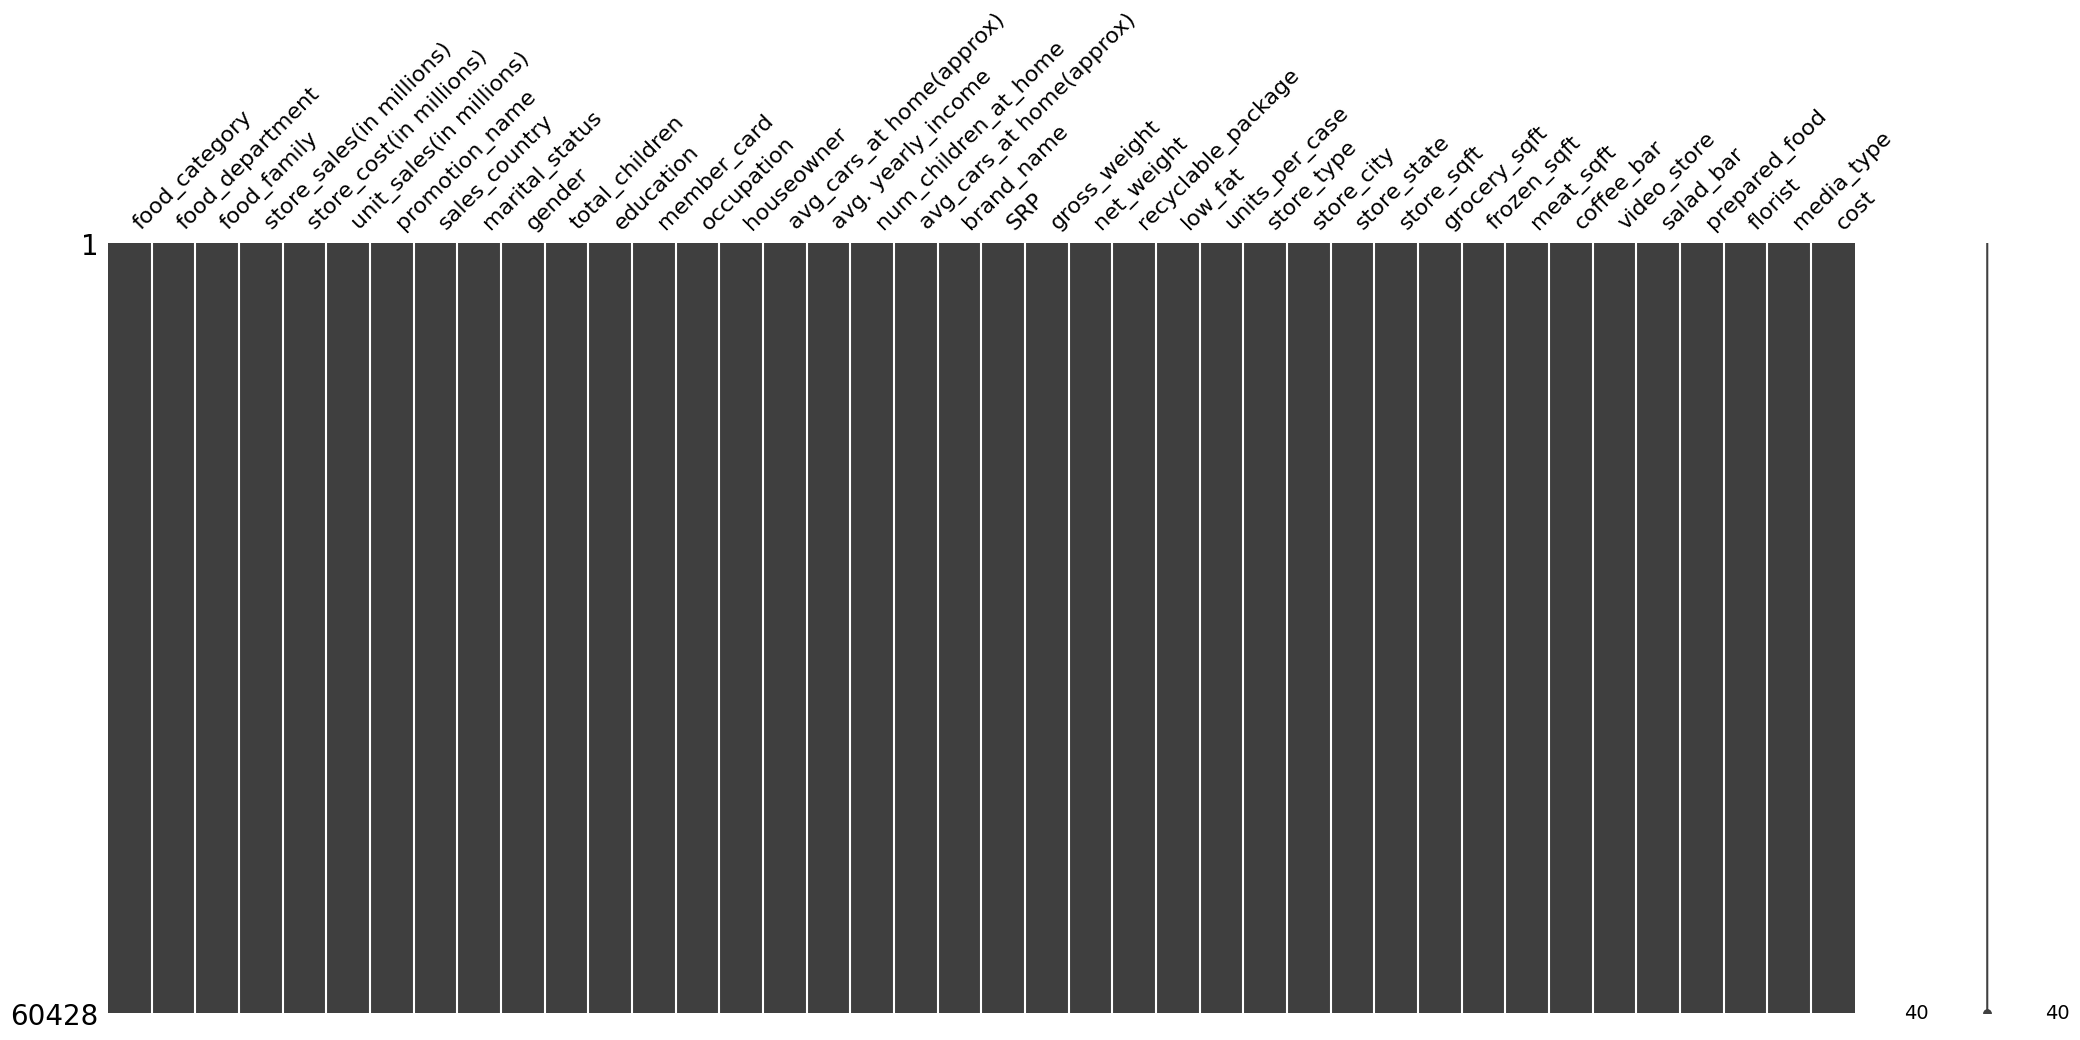

In [16]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

Esta visualización nos muestra que una franja uniforme de color negro en todas las columnas del Dataset significa que no tenemos a lo largo de cada franja valores nulos a verificar que hallan sido extraidos del Dataset original.

**Podemos concluir que este archivo no contiene valores Nulos luego de hacer todas las validaciones**

###**Eliminación de Columnas**

Dado que la columna 18 y la 15 originales son las mismas, eliminamos una de las dos:

In [17]:
df = df.drop(df.columns[18], axis=1)

Nuevas dimensiones del Dataframe:

In [18]:
df.shape

(60428, 38)

Dataframe actualizado

In [19]:
df

food_category food_department     food_family  \
0      Breakfast Foods    Frozen Foods            Food   
1      Breakfast Foods    Frozen Foods            Food   
2      Breakfast Foods    Frozen Foods            Food   
3      Breakfast Foods    Frozen Foods            Food   
4      Breakfast Foods    Frozen Foods            Food   
...                ...             ...             ...   
60423        Specialty        Carousel  Non-Consumable   
60424        Specialty        Carousel  Non-Consumable   
60425        Specialty        Carousel  Non-Consumable   
60426        Specialty        Carousel  Non-Consumable   
60427        Specialty        Carousel  Non-Consumable   

      store_sales(in millions) store_cost(in millions)  \
0                         7.36                  2.7232   
1                         5.52                  2.5944   
2                         3.68                  1.3616   
3                         3.68                  1.1776   
4                         4.08                   1.428   
...                        ...                     ...   
60423                     2.76                  1.3248   
60424                      1.6                   0.496   
60425                     5.52                  2.5392   
60426                     8.28                  2.5668   
60427                      9.2                   4.232   

      unit_sales(in millions)         promotion_name sales_country  \
0                         4.0           Bag Stuffers           USA   
1                         3.0  Cash Register Lottery           USA   
2                         2.0    High Roller Savings           USA   
3                         2.0  Cash Register Lottery           USA   
4                         3.0       Double Down Sale           USA   
...                       ...                    ...           ...   
60423                     1.0          You Save Days           USA   
60424                     1.0          Price Cutters           USA   
60425                     2.0       Weekend Markdown           USA   
60426                     3.0             Sales Days        Canada   
60427                     4.0     Super Duper Savers        Canada   

      marital_status gender total_children            education member_card  \
0                  M      F            1.0  Partial High School      Normal   
1                  M      M            0.0     Bachelors Degree      Silver   
2                  S      F            4.0  Partial High School      Normal   
3                  M      F            2.0   High School Degree      Bronze   
4                  M      M            0.0  Partial High School      Bronze   
...              ...    ...            ...                  ...         ...   
60423              M      F            1.0  Partial High School      Normal   
60424              S      F            2.0   High School Degree      Bronze   
60425              M      M            1.0   High School Degree      Bronze   
60426              S      M            2.0     Bachelors Degree      Bronze   
60427              S      F            3.0  Partial High School      Bronze   

           occupation houseowner avg. yearly_income num_children_at_home  \
0      Skilled Manual          Y        $10K - $30K                  1.0   
1        Professional          Y        $50K - $70K                  0.0   
2              Manual          N        $10K - $30K                  0.0   
3              Manual          Y        $30K - $50K                  2.0   
4      Skilled Manual          N        $30K - $50K                  0.0   
...               ...        ...                ...                  ...   
60423  Skilled Manual          Y        $10K - $30K                  1.0   
60424  Skilled Manual          N        $30K - $50K                  0.0   
60425          Manual          Y        $30K - $50K                  0.0   
60426    Professional          N        $70K - $90K              

###Transformación y normalización de Datos

Validamos estos:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   food_category             60428 non-null  object
 1   food_department           60428 non-null  object
 2   food_family               60428 non-null  object
 3   store_sales(in millions)  60428 non-null  object
 4   store_cost(in millions)   60428 non-null  object
 5   unit_sales(in millions)   60428 non-null  object
 6   promotion_name            60428 non-null  object
 7   sales_country             60428 non-null  object
 8   marital_status            60428 non-null  object
 9   gender                    60428 non-null  object
 10  total_children            60428 non-null  object
 11  education                 60428 non-null  object
 12  member_card               60428 non-null  object
 13  occupation                60428 non-null  object
 14  houseowner            

**Formateamos columnas a datos de tipo numericos para poder utilizarlas en futuros graficos**

Columna store_cost(in millions)

In [21]:
df['store_cost(in millions)'] = df['store_cost(in millions)'].replace({',': ''}, regex=True)

In [22]:
df['store_cost(in millions)'] = pd.to_numeric(df['store_cost(in millions)'], errors='coerce')

Columna store_sales(in millions)

In [23]:
df['store_sales(in millions)'] = df['store_sales(in millions)'].replace({',': ''}, regex=True)

In [24]:
df['store_sales(in millions)'] = pd.to_numeric(df['store_sales(in millions)'], errors='coerce')

Columna avg. yearly_income

In [25]:
df['avg. yearly_income'] = df['avg. yearly_income'].replace({',': ''}, regex=True)

In [26]:
df['avg. yearly_income'] = pd.to_numeric(df['avg. yearly_income'], errors='coerce')

Columna cost

In [27]:
df['cost'] = df['cost'].replace({',': ''}, regex=True)

In [28]:
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

**Nueva exploración con datos formateados**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  object 
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  object 
 9   gender                    60428 non-null  object 
 10  total_children            60428 non-null  object 
 11  education                 60428 non-null  object 
 12  member_card               60428 non-null  object 
 13  occupation                60428 non-null  object 
 14  houseo

Descripción de las columnas normalizadas

In [30]:
df.describe().fillna(0)

store_sales(in millions)  store_cost(in millions)  avg. yearly_income  \
count              60428.000000             60428.000000                 0.0   
mean                   6.541031                 2.619460                 0.0   
std                    3.463047                 1.453009                 0.0   
min                    0.510000                 0.163200                 0.0   
25%                    3.810000                 1.500000                 0.0   
50%                    5.940000                 2.385600                 0.0   
75%                    8.670000                 3.484025                 0.0   
max                   22.920000                 9.726500                 0.0   

               cost  
count  60428.000000  
mean      99.262366  
std       30.011257  
min       50.790000  
25%       69.650000  
50%       98.520000  
75%      126.620000  
max      149.750000

###**Outliers**

A continuación para a calcular el porcentaje de Outliers para las dos variables que se desean analizar: ventas por tienda y costos por tienda.

In [31]:
def calcular_outliers_iqr(df, columnas):
    """
    Calcula el porcentaje de outliers para las columnas numéricas especificadas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR).

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        columnas (list): Lista de nombres de columnas en las que calcular los outliers.

    Returns:
        pd.DataFrame: DataFrame con las columnas seleccionadas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in columnas:
        if columna not in df.columns:
            print(f"La columna '{columna}' no se encuentra en el DataFrame.")
            continue

        # Solo calcular para columnas numéricas
        if df[columna].dtype in ['int64', 'float64']:
            q1 = df[columna].quantile(0.25)
            q3 = df[columna].quantile(0.75)
            iqr = q3 - q1
            limite_inferior = q1 - 1.5 * iqr
            limite_superior = q3 + 1.5 * iqr

            # Calcular el porcentaje de outliers
            outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
            porcentaje_outliers = (len(outliers) / len(df)) * 100
            resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

# Ejemplo de uso con la columna 'store_cost(in millions)'
columnas_interes = ['store_sales(in millions)','store_cost(in millions)']
outliers_resultado = calcular_outliers_iqr(df, columnas_interes)
print(outliers_resultado)

                    Columna  Porcentaje_Outliers
0   store_cost(in millions)             1.631694
1  store_sales(in millions)             0.537830


Vemos los porcentajes:

In [32]:
calcular_outliers_iqr(df, columnas_interes)

Columna  Porcentaje_Outliers
0   store_cost(in millions)             1.631694
1  store_sales(in millions)             0.537830

**Dado que el porcentaje de outliers es mayor para la variable store_cost(in millions) , escogemos esta variable para trabajar los outliers y los modelos.**

Generamos visualizaciones de las variables explicadas en Generalidades, para determinar los outliers, usando Plotly.Express para visualizar el valor de estos outliers por Columnas:

In [33]:
# Lista de variables para el boxplot
variables = ['food_category', 'food_department', 'food_family', 'promotion_name',
             'sales_country', 'marital_status', 'gender', 'education',
             'member_card', 'occupation', 'store_type']

# Crear un bucle para generar un boxplot para cada variable
for variable in variables:
    fig = px.box(df, x=variable, y='store_cost(in millions)',
                 title=f'Boxplot de {variable} vs store_cost(in millions)')
    fig.update_layout(title_x=0.5)  # Centrar el título
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Conclusiones sobre el impacto de los outliers en el modelado

*  **Food_category:** En todos los tipos de productos se presentan cantidades significativas de valores atípicos. A través del boxplot, observamos que productos como vegetales y productos plásticos tienen un mayor porcentaje de outliers.

*  **Food_department:** Similar a la categoría anterior, todos los departamentos muestran valores atípicos, siendo el departamento de alimentos enlatados el que presenta el mayor porcentaje de outliers.

*  **Food_family:** En las diferentes categorías de alimentos, se observan costos más altos, pero igualmente se encuentran valores atípicos en todos los tipos de food family.

*  **Promotion_name:** Hay outliers en todas las promociones, destacando la "Two day sale" como la promoción con el mayor costo atípico.

*  **Sales_country:** Todos los países presentan valores atípicos, pero en USA se observa un porcentaje de costos ligeramente más alto.

*  **Marital_status:** Tanto para clientes casados como solteros, se identifican valores atípicos en los costos, con una diferencia mínima a favor de los clientes casados.

*  **Gender:** Para ambos géneros se presentan outliers en los costos, siendo las mujeres quienes muestran una diferencia mínima en los valores atípicos.

*  **Education:** En todos los niveles educativos se encuentran valores atípicos en la variable costo, siendo el "High School Degree" el nivel con una ligera mayor cantidad de outliers.

*  **Member_Card:** Todas las categorías de tarjetas de membresía muestran outliers, con una mínima tendencia en la categoría "Golden".

*  **Occupation:** Todas las categorías ocupacionales presentan outliers, siendo los "professional" quienes tienen costos atípicos más altos.

*  **Store_type:** Al igual que las demás variables, todos los tipos de tiendas presentan valores atípicos, destacándose el "Gourmet Supermarket" con una mayor cantidad de outliers.

**En general,se oberva que en todas las columnas seleccionadas y analizadas, presentamos registros de outliers, cómo se vé en la anterior secuencia de Boxplots. Una razon de esto puede ser por ejemplo algun error, en cambios de divisas entre paises, pero tambien puede deberse a que existen ventas puntuales de alto valor producto de promociones, aperturas en tiendas o factores climáticos.aunque no se debe descartar ninguna, ya que un alto porcentaje de outliers puede afectar significativamente los modelos predictivos.**

##**Visualizaciones generales**

Traemos el Dataframe para trabajar algunas visualizaciones de la secciónd de Generalidades:

In [34]:
df.head(2)

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   

   store_cost(in millions) unit_sales(in millions)         promotion_name  \
0                   2.7232                     4.0           Bag Stuffers   
1                   2.5944                     3.0  Cash Register Lottery   

  sales_country marital_status gender total_children            education  \
0           USA              M      F            1.0  Partial High School   
1           USA              M      M            0.0     Bachelors Degree   

  member_card      occupation houseowner  avg. yearly_income  \
0      Normal  Skilled Manual          Y                 NaN   
1      Silver    Professional          Y                 NaN   

  num_children_at_home  brand_name   SRP gross_weight net_weight  \
0                  1.0  Carrington  1.84         19.7       17.7   
1                  0.0  Carrington  1.84         19.7       17.7   

  recyclable_package low_fat units_per_case          store_type store_city  \
0                1.0     0.0           17.0  Deluxe Supermarket      Salem   
1                1.0     0.0           17.0  Deluxe Supermarket      Salem   

  store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar  \
0          OR    27694.0      18670.0      5415.0    3610.0        1.0   
1          OR    27694.0      18670.0      5415.0    3610.0        1.0   

  video_store salad_bar prepared_food florist          media_type    cost  
0         1.0       1.0           1.0     1.0  Daily Paper, Radio  126.62  
1         1.0       1.0           1.0     1.0  Daily Paper, Radio   59.86

**1. Relación de las ventas y costos con la categoria de comidas**

In [35]:
# Agrupamos por 'food_category' y sumar las ventas y costos
category_sales_costs = df.groupby('food_category').agg(
    {'store_sales(in millions)': 'sum', 'store_cost(in millions)': 'sum'}).reset_index()

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Ventas por Categoría de Alimentos", "Costos por Categoría de Alimentos"))

# Hacemos un gráfico de barras para ventas
fig.add_trace(
    go.Bar( x=category_sales_costs['food_category'], y=category_sales_costs['store_sales(in millions)'],name='Ventas'), row=1, col=1)

# Hacemos un gráfico de líneas para costos
fig.add_trace(go.Scatter(x=category_sales_costs['food_category'], y=category_sales_costs['store_cost(in millions)'],
                         name='Costos', mode='lines+markers' ), row=1, col=2)

# Actualizar diseño
fig.update_layout(title_text="<b>Ventas y Costos por Categoría de Alimentos</b>", title_x=0.5, height=600, width=1200, showlegend=True)

# Mostrar gráfico
fig.show()

Podemos ver tambien la variable como un solo gráfico

In [36]:
# Crear un gráfico de barras
fig = go.Figure(data=[
    go.Bar(name='Ventas', x=category_sales_costs['food_category'], y=category_sales_costs['store_sales(in millions)'])])

# Agregar una línea para los costos
fig.add_trace(go.Scatter( name='Costos',
                         x=category_sales_costs['food_category'], y=category_sales_costs['store_cost(in millions)'], mode='lines+markers'))

# Actualizar el diseño
fig.update_layout(title_text='<b>Ventas y Costos por Categoría de Alimentos</b>', title_x=0.5,title_font=dict(size=20))


**2. Relación de las ventas y costos con departamentos**

In [37]:
department_sales_costs = df.groupby('food_department').agg(
    {'store_sales(in millions)': 'sum', 'store_cost(in millions)': 'sum'}).reset_index()

# Crear un gráfico de barras
fig2 = go.Figure(data=[
    go.Bar(name='Ventas', x=department_sales_costs['food_department'], y=department_sales_costs['store_sales(in millions)'],
           marker_color='green')])

# Agregar una línea para los costos
fig2.add_trace(go.Scatter(name='Costos', x=department_sales_costs['food_department'], y=department_sales_costs['store_cost(in millions)'],
                  mode='lines+markers',line=dict(color='orange')))

# Actualizar el diseño
fig2.update_layout(title_text='<b>Ventas y Costos por Departamento de Alimentos</b>', title_x=0.5, title_font=dict(size=20))


**3. Relación de las ventas por familia de producto**

In [38]:
fig = px.box(df,
             x="food_family",
             y="store_sales(in millions)",
             color="food_family",
             title="Ventas por familia")

fig.update_layout(title_text='<b>Ventas por familia</b>', title_x=0.5, showlegend=False
                  ,xaxis_title="Familia",
                  yaxis_title="Ventas por tienda (en millones)")

Evaluamos costos por familias

In [39]:
family_cost = df.groupby('food_family')['store_cost(in millions)'].sum().reset_index()

fig = px.pie(family_cost, values='store_cost(in millions)', names='food_family',
             title='Costo de la tienda por familia de alimentos')

fig.update_layout(title_x=0.5, title_font=dict(size=20,family='Arial, sans-serif',color='black'))


**4. Relación de las ventas por Promociones**

In [40]:
figu3 = px.box(df,
             x="promotion_name",
             y="store_sales(in millions)",
             color="promotion_name",
             title="Ventas por Promociones")

figu3.update_layout(title_text='<b>Ventas por Promociones</b>', title_x=0.5, showlegend=False, xaxis_title="Nombre de Promoción",
                  yaxis_title="Ventas por tienda (en millones)")


Revisamos costos:

In [41]:
figu4 = px.box(df,
             x="promotion_name",
             y="store_cost(in millions)",
             color="promotion_name",
             title="costos por Promociones")

figu4.update_layout(title_text='<b>costos por Promociones</b>', title_x=0.5, showlegend=False, xaxis_title="Nombre de Promoción",
                  yaxis_title="costos por tienda (en millones)")


**5. Ventas y costos por Pais**

In [42]:
figu5 = px.box(df,
             x="sales_country",
             y="store_sales(in millions)",
             color="sales_country",
             title="Ventas de tiendas por País",
             color_discrete_map={'USA':'blue', 'Mexico':'green', 'Canada':'red'})


figu5.update_layout(title_text='<b>Ventas de tiendas por País</b>', title_x=0.5, showlegend=False, xaxis_title="País",
                  yaxis_title="ventas por tienda (en millones)")

#Grafico de Torta para costo

country_cost = df.groupby('sales_country')['store_cost(in millions)'].sum().reset_index()

figu6 = px.pie(country_cost, values='store_cost(in millions)', names='sales_country',
             title='Costo de la tienda por País')

figu6.update_layout(title_x=0.5, title_font=dict(size=20,family='Arial, sans-serif',color='black'))


In [43]:
figu5.show()

**6. Ventas y costos por Educación**

In [44]:
figu7 = px.box(df,
             x="education",
             y="store_sales(in millions)",
             color="education",
             title="Ventas por educación")

figu7.update_layout(title_text='<b>Ventas por educación</b>', title_x=0.5, showlegend=False, xaxis_title="Nivel educativo",
                  yaxis_title="ventas por tienda (en millones)")


Costos por Educación

In [45]:
education_cost = df.groupby('education')['store_cost(in millions)'].sum().reset_index()

figu8 = px.pie(education_cost, values='store_cost(in millions)', names='education',
             title='Costo de la tienda por nivel educativo')

figu8.update_layout(title_x=0.5, title_font=dict(size=20,family='Arial, sans-serif',color='black'))


**7. Ventas y costos por estado Civil**

In [46]:
df['marital_status'] = df['marital_status'].replace({'S': 'Soltero', 'M': 'Casado'})

# Agrupar por estado civil y sumar ventas y costos
marital_sales_costs = df.groupby('marital_status').agg(
    {'store_sales(in millions)': 'sum', 'store_cost(in millions)': 'sum'}).reset_index()

# Crear un gráfico de barras con colores por estado civil
figu10 = go.Figure(data=[
    go.Bar(name='Ventas', x=marital_sales_costs['marital_status'], y=marital_sales_costs['store_sales(in millions)'],
        marker_color=['red', 'green'])])

# Agregar una línea para los costos
figu10.add_trace(go.Scatter(name='Costos', x=marital_sales_costs['marital_status'], y=marital_sales_costs['store_cost(in millions)'],
    mode='lines+markers', line=dict(color='orange')))

# Actualizar el diseño
figu10.update_layout(title_text='<b>Ventas y Costos por estado civil</b>', title_x=0.5,title_font=dict(size=20))

figu10.show()

**8. Ventas y costos por Género**

In [47]:
gender_sales_costs = df.groupby('gender').agg(
    {'store_sales(in millions)': 'sum', 'store_cost(in millions)': 'sum'}).reset_index()

gender_sales_costs['gender'] = gender_sales_costs['gender'].replace({'F': 'Femenino', 'M': 'Masculino'})

# Crear un gráfico de barras con colores personalizados
figu11 = go.Figure(data=[
    go.Bar(
        name='Ventas', x=gender_sales_costs['gender'], y=gender_sales_costs['store_sales(in millions)'], marker_color=['pink', 'lightblue'] )])

# Agregar una línea para los costos
figu11.add_trace(go.Scatter(
    name='Costos', x=gender_sales_costs['gender'], y=gender_sales_costs['store_cost(in millions)'], mode='lines+markers',
    line=dict(color='orange')))

# Actualizar el diseño
figu11.update_layout(title_text='<b>Ventas y Costos por Género</b>',title_x=0.5,title_font=dict(size=20))


**9. Ventas y costos de tienda por Member Card**

In [48]:
membercard_sales_costs = df.groupby('member_card').agg(
    {'store_sales(in millions)': 'sum', 'store_cost(in millions)': 'sum'}).reset_index()

# Define una lista de colores para cada Member Card
colores = {
    'Normal': 'blue',
    'Bronze': 'green',
    'Silver': 'grey',
    'Golden': 'gold'   }

# Crea el gráfico de barras con colores personalizados
figu12 = go.Figure(data=[
    go.Bar( name='Ventas', x=membercard_sales_costs['member_card'],
    y=membercard_sales_costs['store_sales(in millions)'],
   marker_color=[colores[card] for card in membercard_sales_costs['member_card']])])

# Agrega una línea para los costos
figu12.add_trace(go.Scatter(name='Costos', x=membercard_sales_costs['member_card'], y=membercard_sales_costs['store_cost(in millions)'],
    mode='lines+markers',line=dict(color='red')))

figu12.update_layout(title_text='<b>Ventas y Costos por Member Card</b>',title_x=0.5, title_font=dict(size=20))

figu12.show()

**10. Ventas y costos de tienda por ocupación**

In [49]:
occupation_sales_costs = df.groupby('occupation').agg(
    {'store_sales(in millions)': 'sum', 'store_cost(in millions)': 'sum'}).reset_index()

# Definir color de la ocupación
colors = {
    'Manual': 'blue',
    'Professional': 'green',
    'Skilled Manual': 'red',
    'Management': 'purple',
    'Clerical': 'yellow'}

# Grafico de Barras
figu13 = go.Figure(data=[
    go.Bar(name='Ventas', x=occupation_sales_costs['occupation'], y=occupation_sales_costs['store_sales(in millions)'],
        marker_color=[colors[occupation] for occupation in occupation_sales_costs['occupation']])])

# Gráfico de líneas
figu13.add_trace(go.Scatter( name='Costos', x=occupation_sales_costs['occupation'], y=occupation_sales_costs['store_cost(in millions)'],
    mode='lines+markers', line=dict(color='orange')))

# Actualizar
figu13.update_layout(title_text='<b>Ventas y Costos por Ocupación</b>',title_x=0.5,title_font=dict(size=20))

figu13.show()

**10. Ventas y costos por tipo de tienda**

In [50]:
storetype_sales = df.groupby('store_type')['store_sales(in millions)'].sum().reset_index()

figu8 = px.pie(storetype_sales, values='store_sales(in millions)', names='store_type',
             title='Ventas por tipo de Tienda')

figu8.update_layout(title_x=0.5, title_font=dict(size=20,family='Arial, sans-serif',color='black'))

Corto por Tipo de Tienda

In [51]:
storetype_cost = df.groupby('store_type')['store_cost(in millions)'].sum().reset_index()

figu8 = px.pie(storetype_cost, values='store_cost(in millions)', names='store_type',
             title='Costo por tipo de Tienda')

figu8.update_layout(title_x=0.5, title_font=dict(size=20,family='Arial, sans-serif',color='black'))

Resumen de Tipos de tienda

In [52]:
storetype_sales_costs = df.groupby('store_type').agg(
    {'store_sales(in millions)': 'sum', 'store_cost(in millions)': 'sum'}).reset_index()

# Crear un gráfico de barras
figu14 = go.Figure(data=[
    go.Bar(name='Ventas', x=storetype_sales_costs['store_type'], y=storetype_sales_costs['store_sales(in millions)'],
           marker_color='lightblue')])

# Agregar una línea para los costos
figu14.add_trace(go.Scatter(name='Costos', x=storetype_sales_costs['store_type'], y=storetype_sales_costs['store_cost(in millions)'],
                  mode='lines+markers',line=dict(color='orange')))

# Actualizar el diseño
figu14.update_layout(title_text='<b>Ventas y Costos por Tipo de Tienda</b>', title_x=0.5, title_font=dict(size=20))

Con estas visualizaciones nos hacemos una idea de las hipotesis que vamos a plantear a continuación relacionando datos de manera más análitica acorde a preguntas normalesque se pueden inferir de una estrategia gerencial o campaña de Mercadeo.

## **Hipótesis planteadas**


A continuación se plantean las siguientes hipotesis teniendo en cuenta la exploración de nuestro Dataset:

**Hipotesis 1:** Las promociones como "Two Day sale", "Price Savers" y "Green Light Special" incrementan significativamente las ventas unitarias. A su vez superan el costo promedio deseado de esta inversión.

Se planteará como Hipotesis complementaria que estas promociones hacen parte del TOP 10 de promociones implementadas por la cadena.

**Hipotesis 2:** Estados unidos genera más ventas pero a mayor costo que México y Canadá.

**Hipotesis 3:** demostrar que a mayor nivel educativo de clientes, estos presentan una tendencia de ventas mas altas en Supermercados de lujo o de tipo Gourmet.

Se desea demostrar como hipotesis complementaria que los supermercados de lujo a pesar de su categoría están generando mayores ventas.

**Hipotesis 4:** para la evaluación por generos, se desea investigar si la mediana de ventas del género femenino es mayor a las de el genero masculino.

**Hipotesis 5:** Los clientes solteros compran más bebidas alcoholicas.

**Hipotesis 6:** La tarjeta de categoría Golden genera mayores rangos en montos de ventas.

### **HIPOTESIS 1:** Impacto de las promociones de ventas

In [53]:
#Agrupamos las ventas en las tiendas por nombres de la promoción:
sales_by_promotion = df.groupby('promotion_name')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(sales_by_promotion)

             promotion_name  store_sales(in millions)  store_cost(in millions)
0              Bag Stuffers                   6932.32                2767.7471
1              Best Savings                   5454.58                2195.0372
2                 Big Promo                   7503.66                3020.6026
3        Big Time Discounts                   9805.89                3936.3625
4          Big Time Savings                   4995.39                1994.6641
5              Bye Bye Baby                   5554.61                2234.1963
6     Cash Register Lottery                   9821.71                3955.9581
7        Coupon Spectacular                   2350.58                 936.9022
8                 Dimes Off                   7482.87                2998.4700
9            Dollar Cutters                   8478.62                3389.6142
10              Dollar Days                   3461.17                1384.7203
11         Double Down Sale                  11443.0

In [54]:
#Descripciónn del conjunto de datos agrupado por promociones para ventas y costos por tienda
sales_by_promotion.groupby('promotion_name').describe().fillna(0)

store_sales(in millions)                           \
                                           count      mean  std       min   
promotion_name                                                              
Bag Stuffers                                 1.0   6932.32  0.0   6932.32   
Best Savings                                 1.0   5454.58  0.0   5454.58   
Big Promo                                    1.0   7503.66  0.0   7503.66   
Big Time Discounts                           1.0   9805.89  0.0   9805.89   
Big Time Savings                             1.0   4995.39  0.0   4995.39   
Bye Bye Baby                                 1.0   5554.61  0.0   5554.61   
Cash Register Lottery                        1.0   9821.71  0.0   9821.71   
Coupon Spectacular                           1.0   2350.58  0.0   2350.58   
Dimes Off                                    1.0   7482.87  0.0   7482.87   
Dollar Cutters                               1.0   8478.62  0.0   8478.62   
Dollar Days                                  1.0   3461.17  0.0   3461.17   
Double Down Sale                             1.0  11443.00  0.0  11443.00   
Double Your Savings                          1.0   1583.40  0.0   1583.40   
Fantastic Discounts                          1.0   1149.49  0.0   1149.49   
Free For All                                 1.0  10553.45  0.0  10553.45   
Go For It                                    1.0  10124.34  0.0  10124.34   
Green Light Days                             1.0  11179.51  0.0  11179.51   
Green Light Special                          1.0   2766.31  0.0   2766.31   
High Roller Savings                          1.0  11548.20  0.0  11548.20   
I Cant Believe It Sale                       1.0   6313.63  0.0   6313.63   
Money Savers                                 1.0  10031.30  0.0  10031.30   
Mystery Sale                                 1.0   3341.26  0.0   3341.26   
One Day Sale                                 1.0  11658.77  0.0  11658.77   
Pick Your Savings                            1.0   5736.84  0.0   5736.84   
Price Cutters                                1.0   7050.83  0.0   7050.83   
Price Destroyers                             1.0   9098.54  0.0   9098.54   
Price Savers                                 1.0  15290.61  0.0  15290.61   
Price Slashers                               1.0  11150.16  0.0  11150.16   
Price Smashers                               1.0   2996.86  0.0   2996.86   
Price Winners                                1.0  13925.79  0.0  13925.79   
Sale Winners                                 1.0   5742.73  0.0   5742.73   
Sales Days                                   1.0   7425.76  0.0   7425.76   
Sales Galore                                 1.0   7840.59  0.0   7840.59   
Save-It Sale                                 1.0  13227.02  0.0  13227.02   
Saving Days                                  1.0   8916.86  0.0   8916.86   
Savings Galore                               1.0   6662.80  0.0   6662.80   
Shelf Clearing Days                          1.0  11394.93  0.0  11394.93   
Shelf Emptiers                               1.0   5227.64  0.0   5227.64   
Super Duper Savers                           1.0  12841.17  0.0  12841.17   
Super Savers                                 1.0  12858.23  0.0  12858.23   
Super Wallet Savers                          1.0   2588.79  0.0   2588.79   
Three for One                                1.0   6806.52  0.0   6806.52   
Tip Top Savings                              1.0   5601.89  0.0   5601.89   
Two Day Sale                                 1.0  15201.72  0.0  15201.72   
Two for One                                  1.0   9795.77  0.0   9795.77   
Unbeatable Price Savers                      1.0   7914.11  0.0   7914.11   
Wallet Savers                                1.0   4106.82  0.0   4106.82   
Weekend Markdown                             1.0  15378.81  0.0  15378.81   
You Save Days                                1.0   6945.55  0.0   6945.55   

                   

Elaboramos una visualización de Barras que nos permita ver estos resultados

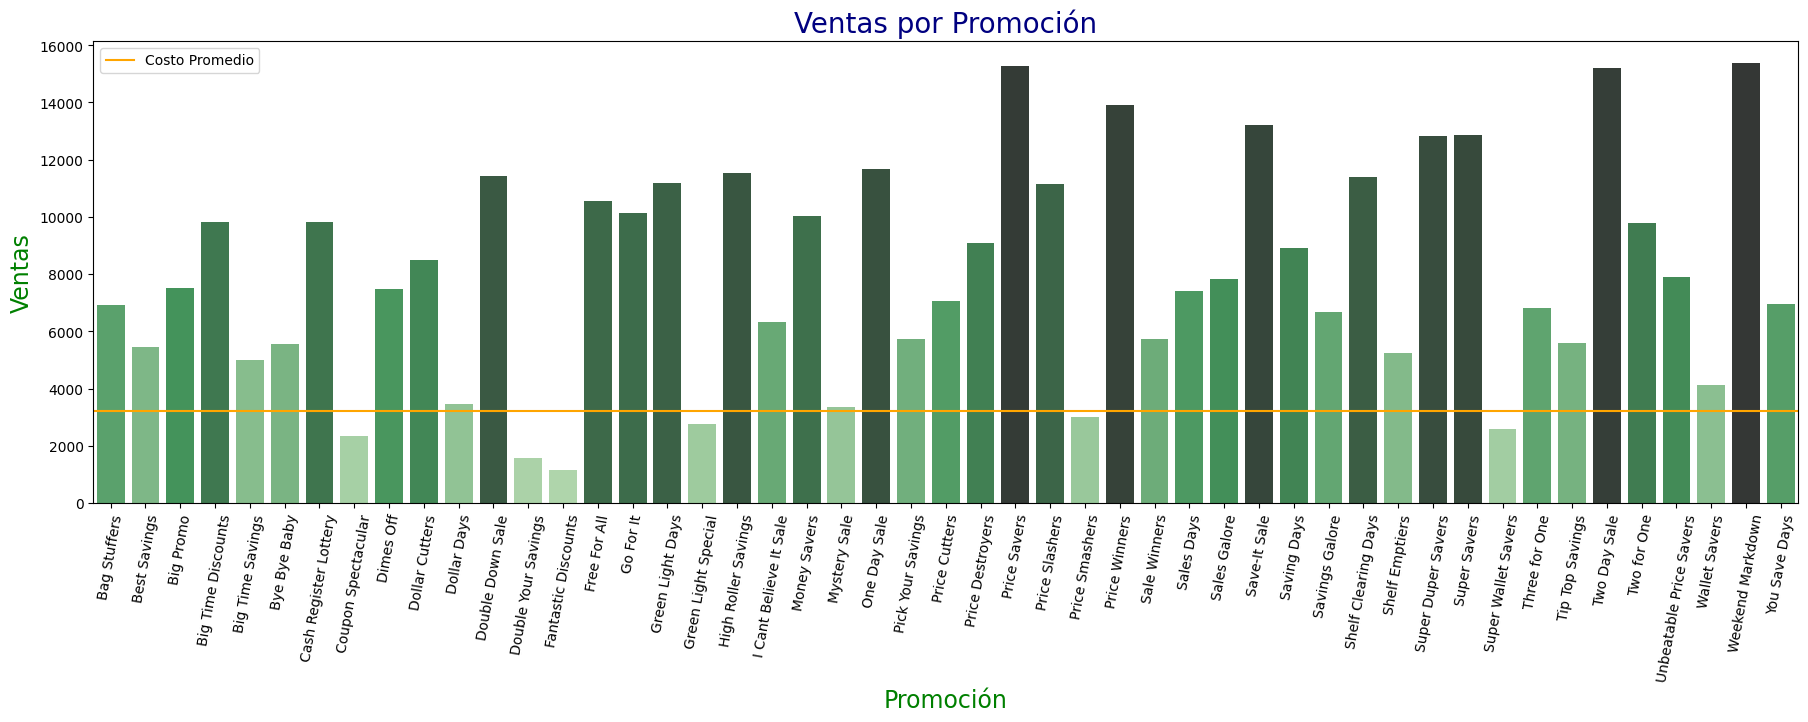

In [55]:
#Extraer los valores de ventas en una variable nueva para el eje y
sales_values = sales_by_promotion['store_sales(in millions)']
#definimos la paleta de colores en función de la nueva variable de eje y:
palette = sns.color_palette("Greens_d", len(sales_values))
#Ordenamos el tono de la paleta de menor a mayor:
rank = sales_values.argsort().argsort()
#Usamos rank para indexar la paleta invertida y asignar los colores a las barras en el orden correcto según las ventas:
palette = np.array(palette)[rank].tolist()

GF1 = plt.figure(figsize=(22, 6))
#Creamos un grafico de Barras con la ayuda de la lubreria Seaborn:
sns.barplot(x='promotion_name', y='store_sales(in millions)',
            hue='promotion_name', data=sales_by_promotion, palette=palette, legend=False)
#Seteamos los titulos y ejes del gráfico:
plt.title('Ventas por Promoción',color='navy', fontsize=20)
plt.xlabel('Promoción',color='green', fontsize=17)
plt.ylabel('Ventas',color='green', fontsize=17)
plt.axhline(y=sales_by_promotion['store_cost(in millions)'].mean(), color='orange', linestyle='-', label='Costo Promedio')
plt.legend()
plt.xticks(rotation=80)
GF1=plt.show()

**Conclusión 1 de la Hipotesis 1:**  Las promociones "Two Day sale", "Price Savers" superaron mucho los costos promedio calculados y generaron ventas por encima de los 14000 millones, pero la promoción "Green Light Special" no pudo cruzar el umbral demarcado por los costos promedio.

A continuación, obtenemos el TOP 10 de las promociones

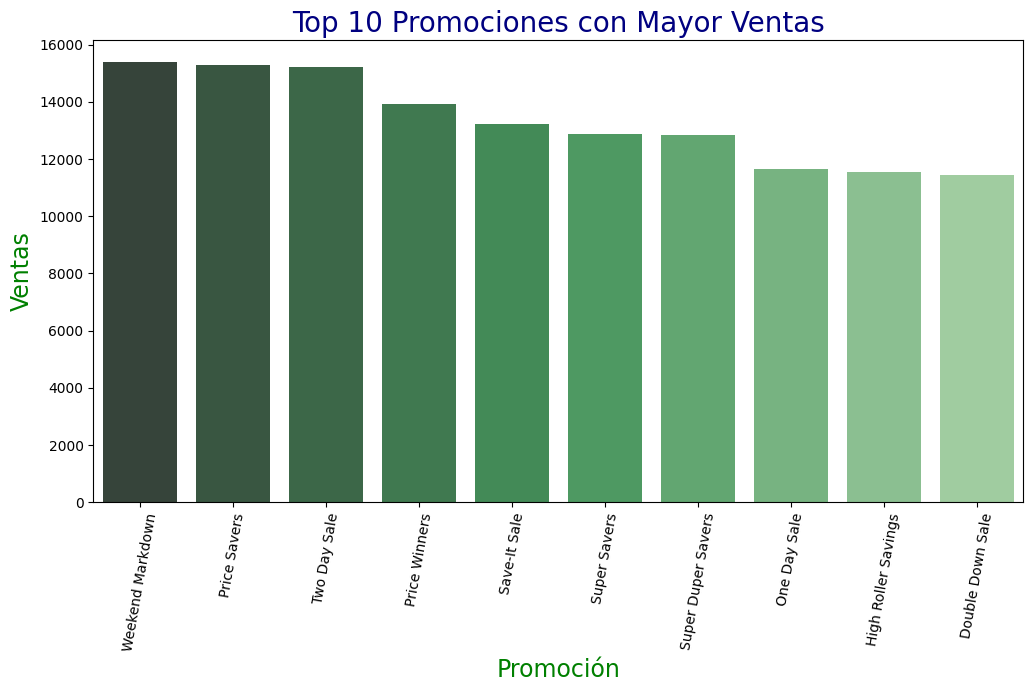

In [56]:
# Obtener el Top 10 de promociones con mayores ventas
top_promotions = sales_by_promotion.nlargest(10, 'store_sales(in millions)')

# Definimos la paleta de colores según la nueva variable del eje y para el Top 10
palette = sns.color_palette("Greens_d", len(top_promotions))

# Ordenamos el tono de la paleta de menor a mayor
rank = top_promotions['store_sales(in millions)'].argsort().argsort()

# Reasignamos la paleta con los colores ordenados
palette = np.array(palette)[rank]

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras con el Top 10
sns.barplot(x='promotion_name', y='store_sales(in millions)',data=top_promotions, palette=palette.tolist(), hue='promotion_name', legend=False)

# Configuramos los títulos y etiquetas de los ejes
plt.title('Top 10 Promociones con Mayor Ventas',color='navy', fontsize=20)
plt.xlabel('Promoción',color='green', fontsize=17)
plt.ylabel('Ventas',color='green', fontsize=17)

# Rotamos las etiquetas del eje x para mejor visualización
plt.xticks(rotation=80)

# Mostramos el gráfico
plt.show()

**Conclusión 2 de la Hipotesis 1:** En estra representación gráfica se muestran las 10 promociones con mayores ventas de las cuales "Two Day sale" y "Price Savers" ocupan el segundo y tercer lugar de mayores ventas respectivamente.

Con ambos gráficos vemos que "Weekend Markdown" tiene un impacto significativamente positivo en las ventas, ocupando el primer lugar.

Las promociones como por ejemplo Weekend Markdown, Price Savers, Two Day Sale, Price Winners, entre otras cuyas barras están por encima del costo promedio son las más rentables.

Las promociones que estan cerca de la barra promedio requieren mas ajustes para mejorar su rentabilidad.

Las promociones que aparecen en el TOP 10 son las más exitosas generando mayor impacto lo cuál deberían ser priorizadas en futuras estrategias.

### **HIPOTESIS 2:** Ventas-costos de paises

In [57]:
#Agrupamos las ventas de las tiendas por Paises:
country_sales_cost = df.groupby('sales_country')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(country_sales_cost)

  sales_country  store_sales(in millions)  store_cost(in millions)
0        Canada                  26277.08               10523.4346
1        Mexico                 115565.10               46377.6993
2           USA                 253419.22              101387.5648


In [58]:
#Generamos una descripción del nuevo dataframe agrupado por paises:
country_sales_cost.groupby('sales_country').describe().fillna(0)

store_sales(in millions)                                        \
                                 count       mean  std        min        25%   
sales_country                                                                  
Canada                             1.0   26277.08  0.0   26277.08   26277.08   
Mexico                             1.0  115565.10  0.0  115565.10  115565.10   
USA                                1.0  253419.22  0.0  253419.22  253419.22   

                                               store_cost(in millions)  \
                     50%        75%        max                   count   
sales_country                                                            
Canada          26277.08   26277.08   26277.08                     1.0   
Mexico         115565.10  115565.10  115565.10                     1.0   
USA            253419.22  253419.22  253419.22                     1.0   

                                                                        \
                      mean  std          min          25%          50%   
sales_country                                                            
Canada          10523.4346  0.0   10523.4346   10523.4346   10523.4346   
Mexico          46377.6993  0.0   46377.6993   46377.6993   46377.6993   
USA            101387.5648  0.0  101387.5648  101387.5648  101387.5648   

                                         
                       75%          max  
sales_country                            
Canada          10523.4346   10523.4346  
Mexico          46377.6993   46377.6993  
USA            101387.5648  101387.5648

A continuación, vamos a generar dos gráficos:
- Barras, para comparar con esta visualización las ventas por paises.
- Líneas, para ver la tendencia entre ventas y costos de las tiendas en estos paises.

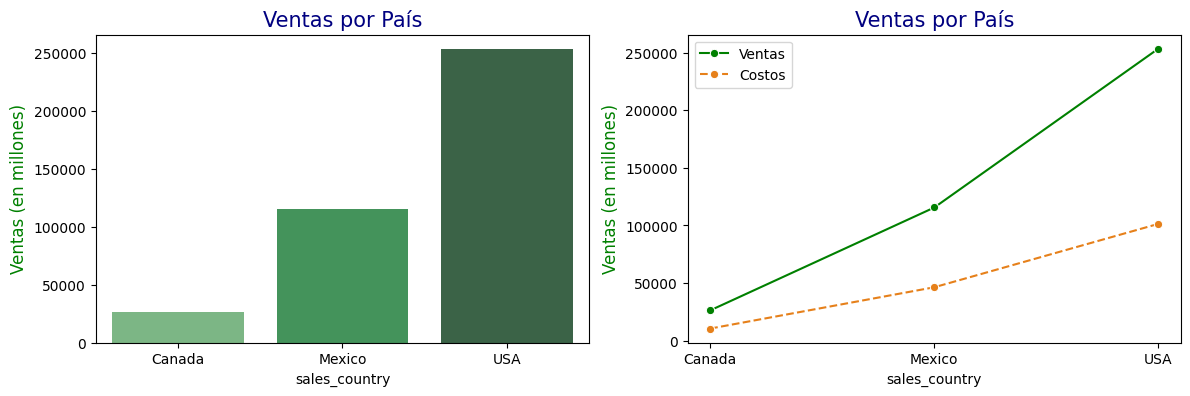

In [59]:
#Establecemos las dimensiones de los graficos y la posición de cada uno con la Herramienta Pyplot de Matplotlip
#Crearemos 3 gráicos diferentes
GF2= fig, axes = plt.subplots(1, 2, figsize=(14, 4))

#POSICIÓN 1
#grafico de barras ventas por pais con la lubrería Seaborn
axes1 = sns.barplot(x='sales_country', y='store_sales(in millions)', hue='sales_country', data=country_sales_cost, ax=axes[0], palette='Greens_d', legend=False)
#Edición de titulos y Texto
axes[0].set_title('Ventas por País',color='navy', fontsize=15)
axes[0].set_ylabel('Ventas (en millones)',color='green', fontsize=12)

#POSICIÓN 2
#Grafico de linease variacion de ventas y costos por pais
axes2=sns.lineplot(x='sales_country', y='store_sales(in millions)', data=country_sales_cost, label='Ventas', marker='o', color='green')
axes2_1=sns.lineplot(x='sales_country', y='store_cost(in millions)', data=country_sales_cost, label='Costos', marker='o', color=(0.9, 0.5, 0.1), linestyle='--')
axes[1].set_title('Ventas por País',color='navy', fontsize=15)
axes[1].set_ylabel('Ventas (en millones)',color='green', fontsize=12)



GF2=plt.show()

**Conclusión de la Hipotesis 2:** En Estados Unidos las ventas son significativamente más altas que México y Canadá, esto prodria indicar que EEUU tiene una mayor demanda de productos o que la promociones en este país son mas efectivas.
Por otro lado se observa que en los tres paìses tienen rentabilidad, pero canadá tiene altos costos en comparación a sus ventas generadas.
EEUU tiene más ventas y por lo tanto mayor costo que los demas países, sin embargo, las utilidades generadas se hacen cerca de los 15000 millones, lo cual es muy positivo para su operación.

### **HIPOTESIS 3:** Influencia del nivel educativo para compras por categoría de Tiendas

In [60]:
#Agrupamos las ventas de las tiendas por tipo de tienda:
type_sales_cost = df.groupby('store_type')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(type_sales_cost)

            store_type  store_sales(in millions)  store_cost(in millions)
0   Deluxe Supermarket                 152304.54               61074.9974
1  Gourmet Supermarket                  42974.80               17209.1167
2     Mid-Size Grocery                  18963.35                7602.0270
3        Small Grocery                   6493.96                2596.4851
4          Supermarket                 174524.75               69806.0725


In [61]:
#Realizamos una descipción del nuevo dataframe agrupado por tipo de tienda
type_sales_cost.groupby('store_type').describe().fillna(0)

store_sales(in millions)                             \
                                       count       mean  std        min   
store_type                                                                
Deluxe Supermarket                       1.0  152304.54  0.0  152304.54   
Gourmet Supermarket                      1.0   42974.80  0.0   42974.80   
Mid-Size Grocery                         1.0   18963.35  0.0   18963.35   
Small Grocery                            1.0    6493.96  0.0    6493.96   
Supermarket                              1.0  174524.75  0.0  174524.75   

                                                                 \
                           25%        50%        75%        max   
store_type                                                        
Deluxe Supermarket   152304.54  152304.54  152304.54  152304.54   
Gourmet Supermarket   42974.80   42974.80   42974.80   42974.80   
Mid-Size Grocery      18963.35   18963.35   18963.35   18963.35   
Small Grocery          6493.96    6493.96    6493.96    6493.96   
Supermarket          174524.75  174524.75  174524.75  174524.75   

                    store_cost(in millions)                               \
                                      count        mean  std         min   
store_type                                                                 
Deluxe Supermarket                      1.0  61074.9974  0.0  61074.9974   
Gourmet Supermarket                     1.0  17209.1167  0.0  17209.1167   
Mid-Size Grocery                        1.0   7602.0270  0.0   7602.0270   
Small Grocery                           1.0   2596.4851  0.0   2596.4851   
Supermarket                             1.0  69806.0725  0.0  69806.0725   

                                                                     
                            25%         50%         75%         max  
store_type                                                           
Deluxe Supermarket   61074.9974  61074.9974  61074.9974  61074.9974  
Gourmet Supermarket  17209.1167  17209.1167  17209.1167  17209.1167  
Mid-Size Grocery      7602.0270   7602.0270   7602.0270   7602.0270  
Small Grocery         2596.4851   2596.4851   2596.4851   2596.4851  
Supermarket          69806.0725  69806.0725  69806.0725  69806.0725

A cntinuación vamos a generar los siguientes gráficos de dispersión:

**Ventas y costos por Tipo de tienda**

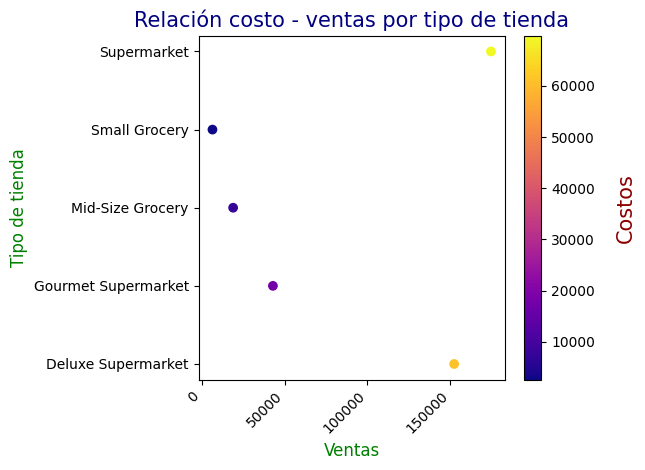

In [62]:
fig, ax = plt.subplots()
#Usamos un gráfico de dispersión con Matplotlip
#Designamos una paleta de colores en función de los costos por tienda:
paleta_colores = ax.scatter(type_sales_cost['store_sales(in millions)'], type_sales_cost['store_type'], c=type_sales_cost['store_cost(in millions)'], cmap='plasma')
cbar_costo=fig.colorbar(paleta_colores, orientation='vertical')
cbar_costo.ax.set_ylabel('Costos', rotation=90, labelpad=15,color='darkred', fontsize=15)
#Modificamos parametros de este grafico
ax.set_title('Relación costo - ventas por tipo de tienda',color='navy', fontsize=15)
ax.set_xlabel('Ventas',color='green', fontsize=12)
ax.set_ylabel('Tipo de tienda', color='green', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Esta representación gráfica permite observar como las ventas varian según el tipo de tienda, y además permite a simple vista cuáles tiendas tienen mayor costos.
Hay dos tipos de tienda como Supermarket y Deluxe Supermarket que a pesar de tener altas ventas, también tienen altos costos.

**Ventas y costos por nivel educativo**

In [63]:
#Agrupamos las ventas de las tiendas por tipo de educación de los usuarios:
education_sales_cost = df.groupby('education')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(education_sales_cost)

             education  store_sales(in millions)  store_cost(in millions)
0     Bachelors Degree                 104179.09               41740.1449
1      Graduate Degree                  19880.73                7957.8046
2   High School Degree                 117959.79               47185.3046
3      Partial College                  34235.70               13707.0960
4  Partial High School                 119006.09               47698.3486


In [64]:
#Descripción del nuevo dataframe con la agrupación por nivel educativo
education_sales_cost.groupby('education').describe().fillna(0)

store_sales(in millions)                             \
                                       count       mean  std        min   
education                                                                 
Bachelors Degree                         1.0  104179.09  0.0  104179.09   
Graduate Degree                          1.0   19880.73  0.0   19880.73   
High School Degree                       1.0  117959.79  0.0  117959.79   
Partial College                          1.0   34235.70  0.0   34235.70   
Partial High School                      1.0  119006.09  0.0  119006.09   

                                                                 \
                           25%        50%        75%        max   
education                                                         
Bachelors Degree     104179.09  104179.09  104179.09  104179.09   
Graduate Degree       19880.73   19880.73   19880.73   19880.73   
High School Degree   117959.79  117959.79  117959.79  117959.79   
Partial College       34235.70   34235.70   34235.70   34235.70   
Partial High School  119006.09  119006.09  119006.09  119006.09   

                    store_cost(in millions)                               \
                                      count        mean  std         min   
education                                                                  
Bachelors Degree                        1.0  41740.1449  0.0  41740.1449   
Graduate Degree                         1.0   7957.8046  0.0   7957.8046   
High School Degree                      1.0  47185.3046  0.0  47185.3046   
Partial College                         1.0  13707.0960  0.0  13707.0960   
Partial High School                     1.0  47698.3486  0.0  47698.3486   

                                                                     
                            25%         50%         75%         max  
education                                                            
Bachelors Degree     41740.1449  41740.1449  41740.1449  41740.1449  
Graduate Degree       7957.8046   7957.8046   7957.8046   7957.8046  
High School Degree   47185.3046  47185.3046  47185.3046  47185.3046  
Partial College      13707.0960  13707.0960  13707.0960  13707.0960  
Partial High School  47698.3486  47698.3486  47698.3486  47698.3486

Generamos la respectiva visualización

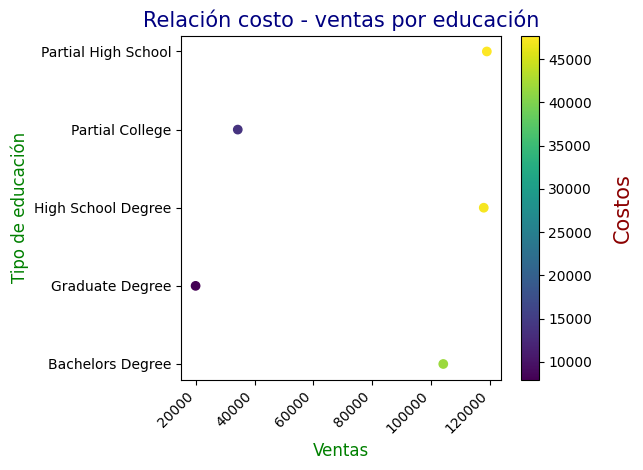

In [65]:
#Repetimos los mismos pasos del grafico anterior pero con el nuevo grupo por educación:
fig, ax = plt.subplots()

paleta_colores2 = ax.scatter(education_sales_cost['store_sales(in millions)'], education_sales_cost['education'], c=education_sales_cost['store_cost(in millions)'], cmap='viridis')
cbar_costo2=fig.colorbar(paleta_colores2, orientation='vertical')
cbar_costo2.ax.set_ylabel('Costos', rotation=90, labelpad=15,color='darkred', fontsize=15)
ax.set_title('Relación costo - ventas por educación',color='navy', fontsize=15)
ax.set_xlabel('Ventas', color='green', fontsize=12)
ax.set_ylabel('Tipo de educación', color='green', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

El gráfico permite observar cómo varían las ventas en función del nivel educativo de los clientes. Se identifica que los clientes con una licenciatura o carrera de grado  generan más ventas pero a su vez los clientes que no terminaron la escuela secundaria tambien tiene una tendencia alta en ventas y con altos costos.

**Relación del nivel educativo con la Categoria de las Tiendas**

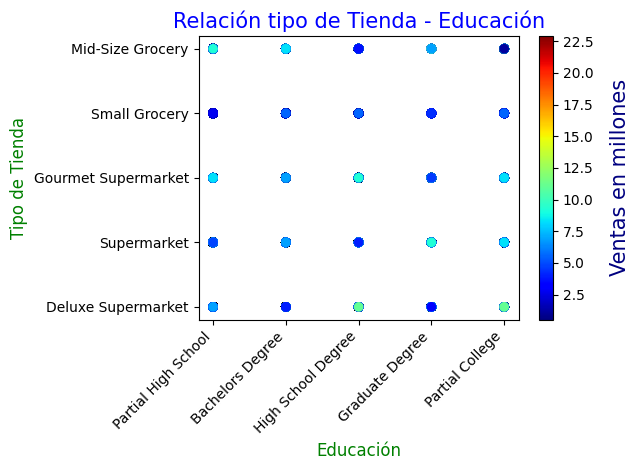

In [66]:
#A continuación usamos el Dataframe original (df) para relacionar las ventas con educación y tipo de tienda
#Repetimos los pasos del gráfico anterior
fig, ax = plt.subplots()

paleta_colores3 = ax.scatter(df['education'], df['store_type'],c=df['store_sales(in millions)'], cmap='jet')
cbar=fig.colorbar(paleta_colores3, orientation='vertical')
cbar.ax.set_ylabel('Ventas en millones', rotation=90, labelpad=12, color='navy', fontsize=15)
ax.set_title('Relación tipo de Tienda - Educación',color='blue', fontsize=15)
ax.set_xlabel('Educación',color='green', fontsize=12)
ax.set_ylabel('Tipo de Tienda', color='green', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Conclusión de la Hipotesis 3:** La gráfica nos permite ver como varían las ventas según el tipo de tienda y el nivel educativo. Por lo que podemos identificar que los clientes que tienen titulo secundario o cursan la universidad prefieren las tiendas de tipo Deluxe Supermarket (tiendas de lujo).

Con este resultado podemos determinar que para futuras aperturas de este tipo de tiendo podemos pensar en zonas del perimetro urbano en donde tengamos cerca escuelas secundarías ó Universidades, dado que esto generará una tendencia positiva en la frecuencia de asistencias y ventas por parte de los estudiantes usuarios de estas instituciones.

### **HIPOTESIS 4:** Comportamiento de la Mediana en costos de ventas por género

In [67]:
#Revisamos exclusivamente costos y generos del dataframe (df)
df[['gender', 'cost']]

gender    cost
0          F  126.62
1          M   59.86
2          F   84.16
3          F   95.78
4          M   50.79
...      ...     ...
60423      F   95.25
60424      F   69.42
60425      M   67.51
60426      M  132.88
60427      F   87.76

[60428 rows x 2 columns]

In [68]:
# Agrupamos costo total y genero para luego poder obtener la suma y la mediana
Mediana_Costo = df.groupby('gender')['cost'].sum().reset_index()
print(Mediana_Costo)

  gender        cost
0      F  3079175.00
1      M  2919051.26


In [69]:
# Definimos cuartiles para poder graficarlos.
cuartiles = df.groupby('gender')['cost'].describe()

# Cuartiles
print(cuartiles[['25%', '50%', '75%']])

          25%    50%     75%
gender                      
F       70.32  97.34  126.62
M       69.63  98.81  126.24


Generación de un gráfico Caja - Bigote (Boxplot) para costos de ventas por Género

In [70]:
# Creamos grafico de costo total por genero.
fig = px.box(df,
             x='gender',
             y='cost',
             color='gender',
             color_discrete_map={'M': 'blue', 'F': 'pink'},# Color asignado segun genero
             category_orders={'gender': ['F', 'M']},  # Orden de las categorías
             title='Costo Total por Género')

# Editar los títulos princial, de los ejes x e y
fig.update_layout(
    xaxis_title=dict(text='Género', font=dict(size=18, color='green')),#Encabezado eje x
    yaxis_title=dict(text='Costo', font=dict(size=18, color='green')),#Encabezado eje y
    title=dict(text='Costo Total por Género', x=0.5,font=dict(size=20, color='blue')),#Encabezado principal
     xaxis = dict(tickmode = 'array',
                 tickvals = ['F', 'M'],
                 ticktext = ['Femenino', 'Masculino'])) # Renombrar las etiquetas del eje x


fig.show()

Verificacion de los datos mostrados en grafico, calculamos la suma y la mediana

Suma de costos

In [71]:
print(df.groupby('gender')['cost'].sum())

gender
F    3079175.00
M    2919051.26
Name: cost, dtype: float64


Mediana de costos

In [72]:
print(df.groupby('gender')['cost'].median())

gender
F    97.34
M    98.81
Name: cost, dtype: float64


**Conclusión de la Hipotesis 4:** Podemos ver que la mediana del costo de venta es superior en el genero masculino (98.81) comparada con el género femenino (97.34). Sin embargo, esta variación de la mediana no es muy significativa, así como sus topes maximos, por lo que puede pensarse que para futuras campañas de marketing el factor género puede ser indiferente para analizar cuanto puede costar promover las ventas en una tienda o producto especifico.

### **HIPOTESIS 5:** Tendencias en clientes solteros en bebidas alcoholicas.

In [73]:
# Filtramos df por bebidas alcoholicas "Alcoholic Beverages"
df_Alcoholic_Beverages = df[df['food_department'] == 'Alcoholic Beverages']
print(df_Alcoholic_Beverages)

       food_category      food_department food_family  \
22692  Beer and Wine  Alcoholic Beverages       Drink   
22693  Beer and Wine  Alcoholic Beverages       Drink   
22694  Beer and Wine  Alcoholic Beverages       Drink   
22695  Beer and Wine  Alcoholic Beverages       Drink   
22696  Beer and Wine  Alcoholic Beverages       Drink   
...              ...                  ...         ...   
42378  Beer and Wine  Alcoholic Beverages       Drink   
42379  Beer and Wine  Alcoholic Beverages       Drink   
42380  Beer and Wine  Alcoholic Beverages       Drink   
42381  Beer and Wine  Alcoholic Beverages       Drink   
42382  Beer and Wine  Alcoholic Beverages       Drink   

       store_sales(in millions)  store_cost(in millions)  \
22692                     11.36                   5.1120   
22693                      7.68                   2.6112   
22694                      8.52                   2.8116   
22695                      3.22                   0.9982   
22696          

In [74]:
# Agrupamos los datos por estado civil y sumamos las ventas de bebidas alcoholicas
venta_estado_civil = df_Alcoholic_Beverages.groupby('marital_status')['store_sales(in millions)'].sum().reset_index()
venta_estado_civil['marital_status'] = venta_estado_civil['marital_status'].replace({'S': 'Solteros', 'M': 'Casados'})
print(venta_estado_civil)

  marital_status  store_sales(in millions)
0         Casado                   5398.82
1        Soltero                   4697.79


Creamos un grafico de torta para generar una visualización porcentual

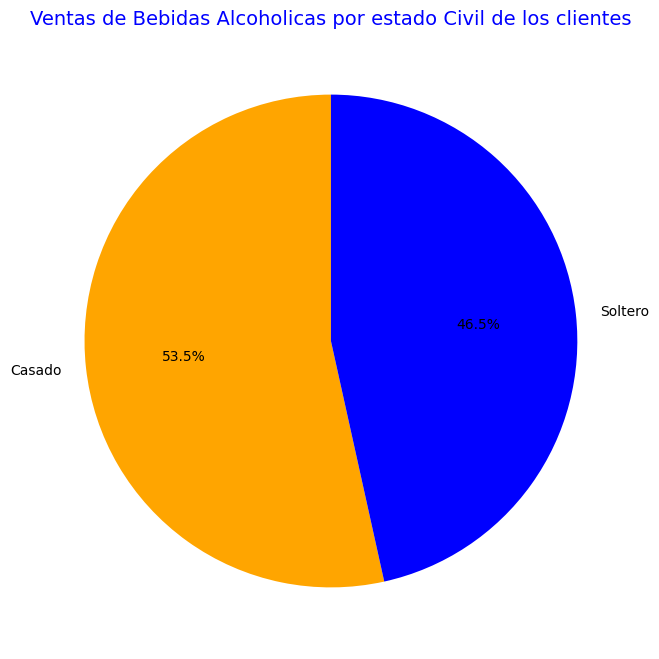

In [75]:
plt.figure(figsize=(8, 8))
plt.pie(venta_estado_civil['store_sales(in millions)'],
        labels=venta_estado_civil['marital_status'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'blue', '#FFD700', '#8A2BE2']) #asignación de parámetros y colores

# Añadir título
plt.title('Ventas de Bebidas Alcoholicas por estado Civil de los clientes', fontsize=14, color='blue') #edición del titulo


plt.show()

Verificamos que los valores en el grafico sean correctos, calculamos ventas de bebidas alcoholicas segun estado civil.

In [76]:
print(venta_estado_civil)

  marital_status  store_sales(in millions)
0         Casado                   5398.82
1        Soltero                   4697.79


**Conclusión de la Hipotesis 5:**  Podemos observar que fuera de lo que se deseaba corroborar, el mayor porcentaje de ventas de bebidas alcoholicas se debe gracias a los clientes casados con un 53.5% de participación equivalente a ventas de 5398.82 millones. Mientras que los solteros poseen una participación de 46.5% de participación, equivalente a 4697.79 millones en ventas.

### **HIPOTESIS 6:** Cantidades ventas de por Member Card

Creamos un Histograma que nos muestre las ventas por categoria de Tarjeta

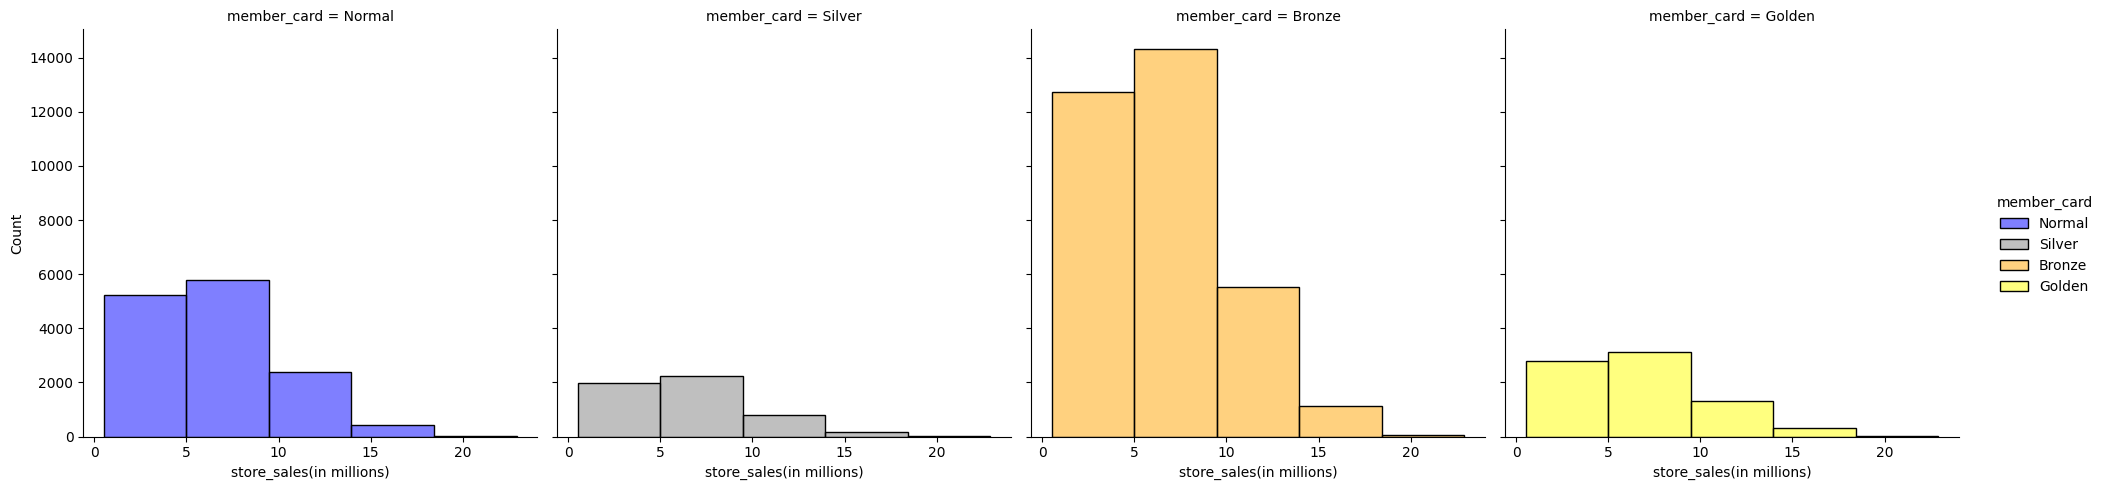

In [77]:
sns.displot(data=df, x="store_sales(in millions)", hue="member_card",col="member_card",bins=5, kde=False, palette={'Normal': 'blue', 'Silver': 'gray', 'Bronze': 'orange', 'Golden': 'yellow'})
plt.show()

**Conclusión de la Hipotesis 6:** La categoría de tarjera Golden no es la que genera mayores frecuencias de ventas ni lidera los grupos de montos de ventas mas altos.

Para esta conclusión vemos que la categoria para miembros de Bronze tiene los picos mas altos en los primeros 3 grupos del Histograma, siendo su mayor frecuencia de ventas aquellas que generan montos entre los 5 y los 10 millones.

**Este Dataset nos permite realizar muchos más estudios para mejorar el rendimiento en costos, ventas y entendimiento de nuestros clientes. Para este proyecto se plantearon las anteriores Hipotesis de interes del autor de dicho estudio.**

## **Construcción de Modelos**

En esta sección, construimos modelos de clasificación utilizando el conjunto de datos preparado.

- Selección de Algoritmos: Elegir algoritmos de clasificación adecuados (por ejemplo, Regresión Lineal, Random Forest, Árbol de decisión).
- Entrenamiento de Modelos: Entrenar modelos utilizando el conjunto de entrenamiento.
- Ajuste de Hiperparámetros: Ajustar hiperparámetros para optimizar el rendimiento de los modelos.

In [78]:
df.head(1)

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   

   store_cost(in millions) unit_sales(in millions) promotion_name  \
0                   2.7232                     4.0   Bag Stuffers   

  sales_country marital_status gender total_children            education  \
0           USA         Casado      F            1.0  Partial High School   

  member_card      occupation houseowner  avg. yearly_income  \
0      Normal  Skilled Manual          Y                 NaN   

  num_children_at_home  brand_name   SRP gross_weight net_weight  \
0                  1.0  Carrington  1.84         19.7       17.7   

  recyclable_package low_fat units_per_case          store_type store_city  \
0                1.0     0.0           17.0  Deluxe Supermarket      Salem   

  store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar  \
0          OR    27694.0      18670.0      5415.0    3610.0        1.0   

  video_store salad_bar prepared_food florist          media_type    cost  
0         1.0       1.0           1.0     1.0  Daily Paper, Radio  126.62

Para nuestro Dataset, entrenaremos la variable store_cost(in millions)

Creamos la semilla

In [79]:
semilla = 900914

Definición de train test

In [80]:
# X será todo menos la columna 'Status' (la target)
X = df.drop(columns=['store_cost(in millions)'])

# y será la columna 'Status' (la target)
y = df['store_cost(in millions)']

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (42299, 37)
Tamaño de X_test: (18129, 37)
Tamaño de y_train: (42299,)
Tamaño de y_test: (18129,)


Creamos los parametros de medición para un modelo de regresión:

In [81]:
column_names = ["Modelo", "R^2", "MAE", "MSE", "RMSE", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [82]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):

 # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

 # Crear un diccionario con los resultados
    resultados_dict = {'Modelo': [nombre_modelo],'R^2': [r2], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'Tiempo': [tiempo_ejecucion]}

 # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

 # Eliminar columnas vacías o todas NA
    resultados_df = resultados_df.dropna(axis=1, how='all')

    return resultados_df

In [83]:
def plot_predictions_vs_actuals(y_test, y_pred):
    # Crear un DataFrame con las predicciones y los valores reales
    df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

    # Establecer el estilo de seaborn
    sns.set(style="whitegrid")

    # Crear el gráfico de dispersión
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='Real', y='Predicted', color='blue', alpha=0.6, label='Predicciones', s=80)

    # Añadir la línea de referencia y=x
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea y=x')

    # Añadir título y etiquetas
    plt.title('Valores Reales vs Predicciones', fontsize=12)
    plt.xlabel('Valores Reales', fontsize=10)
    plt.ylabel('Predicciones', fontsize=10)

    # Mostrar la leyenda y la cuadrícula
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.4)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [84]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Gráfico para evaluar las predicciones
    plot_predictions_vs_actuals(y_test, y_pred)

###Encoding y Normalizado

In [85]:
encoder = LabelEncoder()

# Ajusta el encoder a los datos y transforma la columna 'food_department'
df['food_department_encoded'] = encoder.fit_transform(df['food_department'])

# Ajusta el encoder a los datos y transforma la columna 'food_category'
df['food_category_encoded'] = encoder.fit_transform(df['food_category'])

#Ajusta el encoder a los datos y transforma la columna 'food_family'
df['food_family_encoded'] = encoder.fit_transform(df['food_family'])

# Ajusta el encoder a los datos y transforma la columna 'promotion_name'
df['promotion_name_encoded'] = encoder.fit_transform(df['promotion_name'])

# Ajusta el encoder a los datos y transforma la columna 'sales_country'
df['sales_country_encoded'] = encoder.fit_transform(df['sales_country'])

# Ajusta el encoder a los datos y transforma la columna 'marital_status'
df['marital_status_encoded'] = encoder.fit_transform(df['marital_status'])

# Ajusta el encoder a los datos y transforma la columna 'gender'
df['gender_encoded'] = encoder.fit_transform(df['gender'])

# Ajusta el encoder a los datos y transforma la columna 'education'
df['education_encoded'] = encoder.fit_transform(df['education'])

# Ajusta el encoder a los datos y transforma la columna 'member_card'
df['member_card_encoded'] = encoder.fit_transform(df['member_card'])

# Ajusta el encoder a los datos y transforma la columna 'occupation'
df['occupation_encoded'] = encoder.fit_transform(df['occupation'])

# Ajusta el encoder a los datos y transforma la columna 'store_type'
df['store_type_encoded'] = encoder.fit_transform(df['store_type'])


# Define las características (X) y la variable objetivo (y)
X = df[['food_department_encoded', 'food_category_encoded','food_family_encoded', 'promotion_name_encoded', 'sales_country_encoded','marital_status_encoded', 'gender_encoded', 'education_encoded','member_card_encoded', 'occupation_encoded', 'store_type_encoded', 'store_sales(in millions)','unit_sales(in millions)']]  # Incluye las columnas codificadas
y = df['store_cost(in millions)']  # Tu variable objetivo

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla) # Reemplaza 'semilla' con tu valor de semilla

#### **Árbol de Decisión**

Definir modelo:

In [86]:
modelo1 = DecisionTreeRegressor(ccp_alpha=0.01)

Entrenar modelo:

<ipython-input-84-c92bd9dd3da0>:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Resultados para el modelo: Árbol de Decisión
              Modelo       R^2       MAE       MSE      RMSE     Tiempo
0  Árbol de Decisión  0.891781  0.365192  0.224448  0.473759  13.985662 



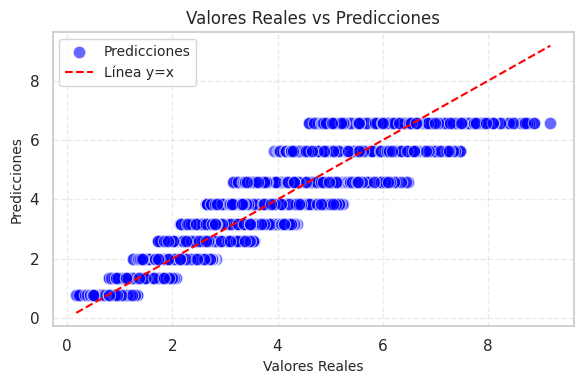

In [87]:
entrenar_modelo(modelo1, 'Árbol de Decisión', X_train, y_train, X_test, y_test)

#### **Random Forest**

Definir modelo:

In [88]:
modelo2 = RandomForestRegressor(n_estimators=100, max_depth=10,random_state=semilla)

Entrenar modelo:

Resultados para el modelo: Random Forest
          Modelo      R^2       MAE       MSE    RMSE     Tiempo
0  Random Forest  0.90868  0.331462  0.189399  0.4352  10.590966 



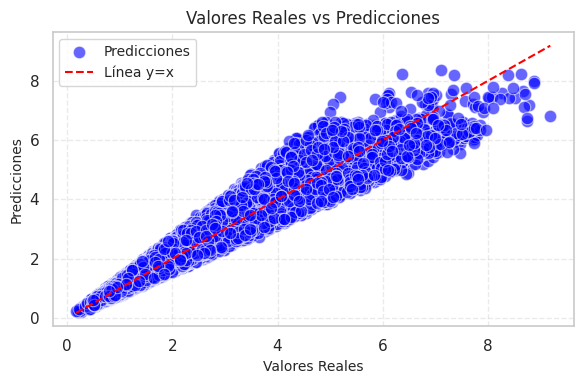

In [89]:
entrenar_modelo(modelo2, 'Random Forest', X_train, y_train, X_test, y_test)

#### **Regresión Lineal**

Definir modelo:

In [90]:
modelo3 = LinearRegression()

Entrenar modelo:

Resultados para el modelo: Regresión Lineal
             Modelo       R^2       MAE       MSE      RMSE    Tiempo
0  Regresión Lineal  0.910513  0.329904  0.185597  0.430809  0.074411 



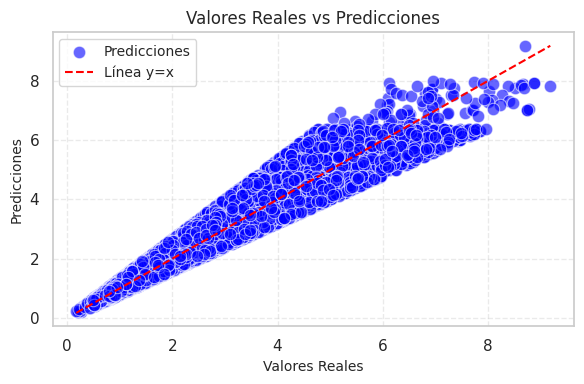

In [91]:
entrenar_modelo(modelo3, 'Regresión Lineal', X_train, y_train, X_test, y_test)

## **Conclusiones**

*En* esta sección, resumimos los resultados y conclusiones clave del proyecto.

- Resumen de Resultados: Resumir los hallazgos y resultados.
- Cumplimiento del Objetivo: Evaluar si el modelo cumple con el objetivo de predecir el precio de las viviendas

In [92]:
resultados_df

Modelo       R^2       MAE       MSE      RMSE     Tiempo
0  Árbol de Decisión  0.891781  0.365192  0.224448  0.473759  13.985662
1      Random Forest  0.908680  0.331462  0.189399  0.435200  10.590966
2   Regresión Lineal  0.910513  0.329904  0.185597  0.430809   0.074411

### **Resumen**

Para predecir las ventas y costos de diferentes tipos de tiendas de supermercado, es crucial considerar tanto la precisión como la eficiencia del modelo. Dado que los tres modelos (**Regresión Lineal, Árbol de Decisión y Random Forest**) tienen un desempeño similar en términos de **precisión (R²)**, podemos centrarnos en otros factores:

**Regresión Lineal**
**Ventajas: **

**Tiempo de ejecución muy bajo:** (0.050210 segundos) Ideal para situaciones donde necesitas resultados rápidos y en tiempo real.

**Alta capacidad explicativa (R² = 0.91):** Captura bien la relación entre las variables.

**Errores moderados (MAE y RMSE):** Suficientemente precisos para muchas aplicaciones.

**Desventajas:**

Podría no capturar relaciones no lineales complejas presentes en los datos de ventas y costos.

**Árbol de Decisión**
**Ventajas:**

**Capacidad explicativa (R² = 0.89):** Buen ajuste y capacidad para interpretar relaciones no lineales.

**Facilidad de interpretación:** Los árboles de decisión son fáciles de entender y visualizar.

**Desventajas:**

**Tiempo de ejecución alto (14.04 segundos):** Puede ser un inconveniente si necesitas resultados rápidos.

**Error ligeramente mayor (RMSE):** Menos preciso que la regresión lineal.

**Random Forest**
**Ventajas:**

**Buena precisión (R² = 0.90):** Combina varios árboles para mejorar la precisión y reducir el sobreajuste.

**Robustez:** Mejor manejo de variabilidad en los datos.

**Desventajas:**

**Tiempo de ejecución relativamente alto (10.87 segundos):** Menos eficiente en tiempo comparado con la regresión lineal.

**Mayor complejidad:** Más difícil de interpretar que un modelo simple de regresión.

**Conclusión**
Si la prioridad es el tiempo de ejecución y la relación entre las variables es lineal: La Regresión Lineal es la mejor opción.

Si necesitas capturar relaciones no lineales y la interpretabilidad es importante: Un Árbol de Decisión puede ser adecuado, pero considera el tiempo de ejecución.

Si buscas un balance entre precisión y robustez: El Random Forest es una excelente opción, aunque con un tiempo de ejecución más alto.

Para predecir las ventas y costos de diferentes tipos de tiendas de supermercado, donde puede haber múltiples factores (como ubicación, tamaño de la tienda, productos, etc.), un Random Forest podría ser más robusto y capaz de manejar la complejidad de los datos, aunque sacrifiques algo de eficiencia en el tiempo de ejecución.


### **Eliminación de outliers**

Dado que las predicciónes de este Dataset fueron de alto pocentaje, no se considera eliminar los outliers. Ademas, el porcentaje de estos analizado en la sección de outliers fue bajo y con el modelo puede verse que estos valores se ajustan mas a ventas recurrentes de alto valor y no tanto a errores de registro.

### **Recomendaciones y Pasos a Seguir**

*Recomendación Final*

Para predecir las ventas y costos de diferentes tipos de tiendas de supermercado, se elige como mejor opción el modelo de Regresión Lineal debido a su tiempo de ejecución más bajo y su alta capacidad explicativa. Aunque el Random Forest también ofrece buena precisión y robustez, su tiempo de ejecución es más alto, lo que puede ser un factor limitante en situaciones donde la velocidad es crucial.

Para escenarios donde la robustez es más importante que el tiempo de ejecución, el Random Forest puede ser una excelente alternativa, especialmente cuando se maneja la complejidad de los datos que pueden incluir múltiples factores como ubicación, tamaño de la tienda, productos y categorias de tipos de tienda o producto para analizar estos comportamientos dentro de cada departamento o división de ventas.

Pasos a Seguir:

**1. Implementación del Modelo:**

* Desplegar el modelo de Regresión Lineal en el entorno de producción para predicciones en tiempo real.

**2. Monitoreo y Mantenimiento:**

* Monitorear el rendimiento del modelo regularmente para asegurar su precisión y ajustar si es necesario.

* Mantener un seguimiento de los valores atípicos y revisar periódicamente para asegurar que sigan siendo ventas recurrentes legítimas.

**3. Consideraciones Futuras:**

*  de manera periódica la necesidad de incluir más datos o características para mejorar la precisión del modelo.

* Considerar la posibilidad de usar Random Forest para escenarios específicos donde la robustez y la capacidad de manejar complejidad son más importantes que la rapidez

**4. Opciones para aplicar otros modelos de Machine Learning:**

Otros algoritmos que se podrían utilizar:

* Support Vector Machines (SVM)

* Gradient Boosting Machines (GBM)

* Neural Networks (Redes Neuronales)

* K-Nearest Neighbors (KNN)

* XGBoost

* Ensemble Methods

* Aprendizaje no supervisado con clustering

Se pone a disposición este proyecto como ejemplo para que otros analistas de este Dataset puedan expandir por medio de nuevas hipotesis, manipulación de otras columnas importantes que tambien pueden tocarse e implementación de las anteriores sugerencias referente a los anteriores algoritmos para Machine Learning.